In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import time 
import sys 
sys.path.append('/Users/aleksandra/Desktop/Research/ILC_params/')

from HOD import *
from ilc_params import *

font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

In [2]:
cib_pdict = websky_cib_pdict
params ="mean"

In [3]:
# if params == "mean":
#     from green_dict_mean import *
#     from red_dict_mean import *
#     from blue_dict_mean import *
# if params == "best-fit":
#     from green_dict import *
#     from red_dict import *
#     from blue_dict import *

# Data 

In [4]:
#data from unwise maps, computed by Ola, 11/22
path_data = "/Users/aleksandra/software/ILC_class-sz_curves_data/g1g2_data/"

#cross
ell_gg_data_17, cl_gg_data_17, sigma_gg_data_17 = np.loadtxt(path_data+"g1g2_unwise_red_x_blue_healpix_dl_nside2048.txt")
ell_gg_data_12, cl_gg_data_12, sigma_gg_data_12 = np.loadtxt(path_data+"g1g2_unwise_green_x_blue_healpix_dl_nside2048.txt")
ell_gg_data_27, cl_gg_data_27, sigma_gg_data_27 = np.loadtxt(path_data+"g1g2_unwise_green_x_red_healpix_dl_nside2048.txt")
#auto
ell_gg_data_11, cl_gg_data_11, sigma_gg_data_11 = np.loadtxt(path_data+"g1g2_unwise_blue_x_blue_healpix_dl_nside2048.txt")
ell_gg_data_22, cl_gg_data_22, sigma_gg_data_22 = np.loadtxt(path_data+"g1g2_unwise_green_x_green_healpix_dl_nside2048.txt")
ell_gg_data_77, cl_gg_data_77, sigma_gg_data_77 = np.loadtxt(path_data+"g1g2_unwise_red_x_red_healpix_dl_nside2048.txt")

cl_to_dl_data = ell_gg_data_11*(ell_gg_data_11+1)/2/np.pi

##  Alex data

In [5]:
path_data = "/Users/aleksandra/Desktop/HOD_unWISE/data_gg_kg/data_paper_HOD/"

bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

trans_blue = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_blue_transfer_namaster.txt')
trans_green = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_green_transfer_namaster.txt')
trans_red = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_red_16.2_transfer_namaster.txt')

s_blue =  0.455
s_green =  0.648
s_red = 0.842

In [6]:
alex1 = np.loadtxt(path_data+'Bandpowers_Auto_Sample1.dat')
alex2 = np.loadtxt(path_data+'Bandpowers_Auto_Sample2.dat')
alex7 = np.loadtxt(path_data+'Bandpowers_Auto_Sample7.dat')

ell_alex_blue, cl_alex_blue, sigma_alex_blue = alex1[0], alex1[1], alex1[2]
ell_alex_green, cl_alex_green, sigma_alex_green = alex2[0], alex2[1], alex2[2]
ell_alex_red, cl_alex_red, sigma_alex_red = alex7[0], alex7[1], alex7[2]
cl_to_dl_alex = ell_alex_blue*(ell_alex_blue+1)/2/np.pi

## Shot noise

In [7]:
# cross shot noise - Krolewski et al. Appendix D
shot_noise_blue_green = 6.22e-9
shot_noise_green_red = 4.67e-8
shot_noise_blue_red = 0

In [8]:
# auto shot noise 
shot_noise_blue  = 4.457537443967693e-08
shot_noise_green  = 1.3465078999999999e-07
shot_noise_red  = 2.7954418e-06

In [9]:
# auto shot noise 
shot_noise_blue  = A_shot_noise_blue
shot_noise_green  = A_shot_noise_green
shot_noise_red  = A_shot_noise_red

shot_noise_blue
#shot noise alex 
# shot_noise_blue = 0.92e-7
# shot_noise_green = 1.81e-7
# shot_noise_red = 29.6e-7

8.304490641155309e-08

# class_sz

In [10]:
z0, dndz0 = np.loadtxt("/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/blue.txt").T
z1, dndz1,  dndz2,  dnd7 = np.loadtxt("/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt").T

In [15]:
#HOD dictonaries 
blue_HOD = blue_hod_pdict
green_HOD = green_hod_pdict
red_HOD = red_hod_pdict


In [16]:
blue_HOD

{'galaxy_sample': 'unwise',
 'galaxy_sample_id': 'blue',
 'UNWISE_dndz_file': '/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt',
 'M0_HOD': 0,
 'M0 equal M_min (HOD)': 'no',
 'x_out_truncated_nfw_profile': 1.0,
 'alpha_s_HOD': 1.34561,
 'sigma_log10M_HOD': 0.120542,
 'M1_prime_HOD': 25524544464954.023,
 'M_min_HOD': 1229506983955.2505,
 'x_out_truncated_nfw_profile_satellite_galaxies': 0.957925}

## Blue x unWISE

In [ ]:
M = Class()
M.set(blue_HOD)
M.set(p18_pdict)
M.set(websky_tsz_pdict)
#M.set(cib_pdict)
M.set(common_settings)

M.set({
        'output':'gal_gal_1h,gal_gal_2h,gal1_gal2_1h,gal1_gal2_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,gal1_lensmag2_1h,gal1_lensmag2_2h,gal2_lensmag1_1h,gal2_lensmag1_2h,lensmag1_lensmag2_1h, lensmag1_lensmag2_2h',
        'class_sz_verbose':0,
        
        #galaxy 1 
        'galaxy_sample1': blue_HOD['galaxy_sample'],
        'galaxy_sample_id1': blue_HOD['galaxy_sample_id'],
        'UNWISE_dndz_file1': blue_HOD['UNWISE_dndz_file'],
    
        'sigma_log10M_HOD_gal1': blue_HOD['sigma_log10M_HOD'],
        'alpha_s_HOD_gal1': blue_HOD['alpha_s_HOD'],
        'M1_prime_HOD_gal1': blue_HOD['M1_prime_HOD'],
        'M_min_HOD_gal1': blue_HOD['M_min_HOD'],
        'x_out_truncated_nfw_profile_satellite_galaxies_gal1': blue_HOD['x_out_truncated_nfw_profile_satellite_galaxies'],
        
        #galaxy 2 
        'galaxy_sample2': green_HOD['galaxy_sample'],
        'galaxy_sample_id2': green_HOD['galaxy_sample_id'],
        'UNWISE_dndz_file2': green_HOD['UNWISE_dndz_file'],
    
        'sigma_log10M_HOD_gal2': green_HOD['sigma_log10M_HOD'],
        'alpha_s_HOD_gal2': green_HOD['alpha_s_HOD'],
        'M1_prime_HOD_gal2': green_HOD['M1_prime_HOD'],
        'M_min_HOD_gal2': green_HOD['M_min_HOD'],
        'x_out_truncated_nfw_profile_satellite_galaxies_gal2': green_HOD['x_out_truncated_nfw_profile_satellite_galaxies'],
  
        })        
M.compute()

blue_gg = M.cl_gg()
blue_gm =M.cl_gm()
blue_mm =M.cl_mm()

blue_x_green_gg = M.cl_g1g2()
blue_x_green_m1m2 = M.cl_m1m2()
blue_x_green_g1m2 = M.cl_g1m2()
green_x_blue_g2m1 = M.cl_g2m1()

In [ ]:
blue_x_green_g1m2

In [ ]:
"""
Blue 
"""

cl_gg_blue_ell = np.asarray(blue_gg['ell'])
cl_gg_blue_1h = np.asarray(blue_gg['1h'])
cl_gg_blue_2h = np.asarray(blue_gg['2h'])
cl_gg_blue = cl_gg_blue_1h+cl_gg_blue_2h

cl_to_dl_gg = cl_gg_blue_ell*(cl_gg_blue_ell+1)/2/np.pi

#lensing magnification terms
#gm
cl_gm_blue_1h = np.asarray(blue_gm['1h'])
cl_gm_blue_2h = np.asarray(blue_gm['2h'])
cl_gm_blue = cl_gm_blue_1h+cl_gm_blue_2h
#mm
cl_mm_blue_1h = np.asarray(blue_mm['1h'])
cl_mm_blue_2h = np.asarray(blue_mm['2h'])
cl_mm_blue = cl_mm_blue_1h+cl_mm_blue_2h

cl_gg_blue_tot = cl_gg_blue + 2*(5*s_blue-2)*(cl_gm_blue)  + (5*s_blue-2)*(5*s_blue-2)*(cl_mm_blue)

In [16]:
"""
Blue x green
"""

cl_gg_blue_green_ell = np.asarray(blue_x_green_gg ['ell'])
cl_gg_blue_green_1h = np.asarray(blue_x_green_gg ['1h'])
cl_gg_blue_green_2h = np.asarray(blue_x_green_gg ['2h'])

cl_gg_blue_green = cl_gg_blue_green_1h + cl_gg_blue_green_2h

#lensing magnification terms
#m1m2
cl_mm_blue_green_ell = np.asarray(blue_x_green_m1m2 ['ell'])
cl_mm_blue_green_1h = np.asarray(blue_x_green_m1m2 ['1h'])
cl_mm_blue_green_2h = np.asarray(blue_x_green_m1m2 ['2h'])

cl_mm_blue_green = cl_mm_blue_green_1h + cl_mm_blue_green_2h


#g1m2
cl_g1m2_blue_green_ell = np.asarray(blue_x_green_g1m2 ['ell'])
cl_g1m2_blue_green_1h = np.asarray(blue_x_green_g1m2 ['1h'])
cl_g1m2_blue_green_2h = np.asarray(blue_x_green_g1m2 ['2h'])

cl_g1m2_blue_green = cl_g1m2_blue_green_1h + cl_g1m2_blue_green_2h

#g2m1
cl_g2m1_green_x_blue_ell = np.asarray(green_x_blue_g2m1 ['ell'])
cl_g2m1_green_x_blue_1h = np.asarray(green_x_blue_g2m1 ['1h'])
cl_g2m1_green_x_blue_2h = np.asarray(green_x_blue_g2m1 ['2h'])

cl_g2m1_green_blue = cl_g2m1_green_x_blue_1h + cl_g2m1_green_x_blue_2h

#all terms
cl_gg_blue_green_total = cl_gg_blue_green + (5*s_green-2)*cl_g1m2_blue_green + (5*s_blue-2)*cl_g2m1_green_blue + (5*s_blue-2)*(5*s_green-2)*cl_mm_blue_green

In [17]:
N = Class()
N.set(blue_HOD)
N.set(p18_pdict)
N.set(websky_tsz_pdict)
N.set(cib_pdict)
N.set(common_settings)



N.set({
        'output':'gal_gal_1h,gal_gal_2h,gal1_gal2_1h,gal1_gal2_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,gal1_lensmag2_1h,gal1_lensmag2_2h,gal2_lensmag1_1h,gal2_lensmag1_2h,lensmag1_lensmag2_1h, lensmag1_lensmag2_2h',
    
        #galaxy 1 
        'galaxy_sample1': blue_HOD['galaxy_sample'],
        'galaxy_sample_id1': blue_HOD['galaxy_sample_id'],
        'UNWISE_dndz_file1': blue_HOD['UNWISE_dndz_file'],
    
        'sigma_log10M_HOD_gal1': blue_HOD['sigma_log10M_HOD'],
        'alpha_s_HOD_gal1': blue_HOD['alpha_s_HOD'],
        'M1_prime_HOD_gal1': blue_HOD['M1_prime_HOD'],
        'M_min_HOD_gal1': blue_HOD['M_min_HOD'],
        'x_out_truncated_nfw_profile_satellite_galaxies_gal1': blue_HOD['x_out_truncated_nfw_profile_satellite_galaxies'],
        
        #galaxy 2 
        'galaxy_sample2': red_HOD['galaxy_sample'],
        'galaxy_sample_id2': red_HOD['galaxy_sample_id'],
        'UNWISE_dndz_file2': red_HOD['UNWISE_dndz_file'],
    
        'sigma_log10M_HOD_gal2': red_HOD['sigma_log10M_HOD'],
        'alpha_s_HOD_gal2': red_HOD['alpha_s_HOD'],
        'M1_prime_HOD_gal2': red_HOD['M1_prime_HOD'],
        'M_min_HOD_gal2': red_HOD['M_min_HOD'],
        'x_out_truncated_nfw_profile_satellite_galaxies_gal2': red_HOD['x_out_truncated_nfw_profile_satellite_galaxies'],
  
        })        
N.compute()

blue_gg = N.cl_gg()
blue_mm = N.cl_mm()
blue_gm =N.cl_gm()

blue_x_red_gg = N.cl_g1g2()
blue_x_red_m1m2 = N.cl_m1m2()
blue_x_red_g1m2 = N.cl_g1m2()
red_x_blue_g2m1 = N.cl_g2m1()


In [18]:
"""
Blue x red
"""

#gg
cl_gg_blue_red_ell = np.asarray(blue_x_red_gg ['ell'])
cl_gg_blue_red_1h = np.asarray(blue_x_red_gg ['1h'])
cl_gg_blue_red_2h = np.asarray(blue_x_red_gg ['2h'])

cl_gg_blue_red = cl_gg_blue_red_1h + cl_gg_blue_red_2h

#lensing magnification terms
#m1m2
cl_mm_blue_red_ell = np.asarray(blue_x_red_m1m2 ['ell'])
cl_mm_blue_red_1h = np.asarray(blue_x_red_m1m2 ['1h'])
cl_mm_blue_red_2h = np.asarray(blue_x_red_m1m2 ['2h'])

cl_mm_blue_red = cl_mm_blue_red_1h + cl_mm_blue_red_2h


#g1m2
cl_g1m2_blue_red_ell = np.asarray(blue_x_red_g1m2 ['ell'])
cl_g1m2_blue_red_1h = np.asarray(blue_x_red_g1m2 ['1h'])
cl_g1m2_blue_red_2h = np.asarray(blue_x_red_g1m2 ['2h'])

cl_g1m2_blue_red = cl_g1m2_blue_red_1h + cl_g1m2_blue_red_2h

#g2m1
cl_g2m1_red_blue_ell = np.asarray(red_x_blue_g2m1 ['ell'])
cl_g2m1_red_blue_1h = np.asarray(red_x_blue_g2m1 ['1h'])
cl_g2m1_red_blue_2h = np.asarray(red_x_blue_g2m1['2h'])

cl_g2m1_red_blue = cl_g2m1_red_blue_1h + cl_g2m1_red_blue_2h

#all terms
cl_gg_blue_red_total = cl_gg_blue_red + (5*s_red-2)*cl_g1m2_blue_red + (5*s_blue-2)*cl_g2m1_red_blue + (5*s_blue-2)*(5*s_red-2)*cl_mm_blue_red


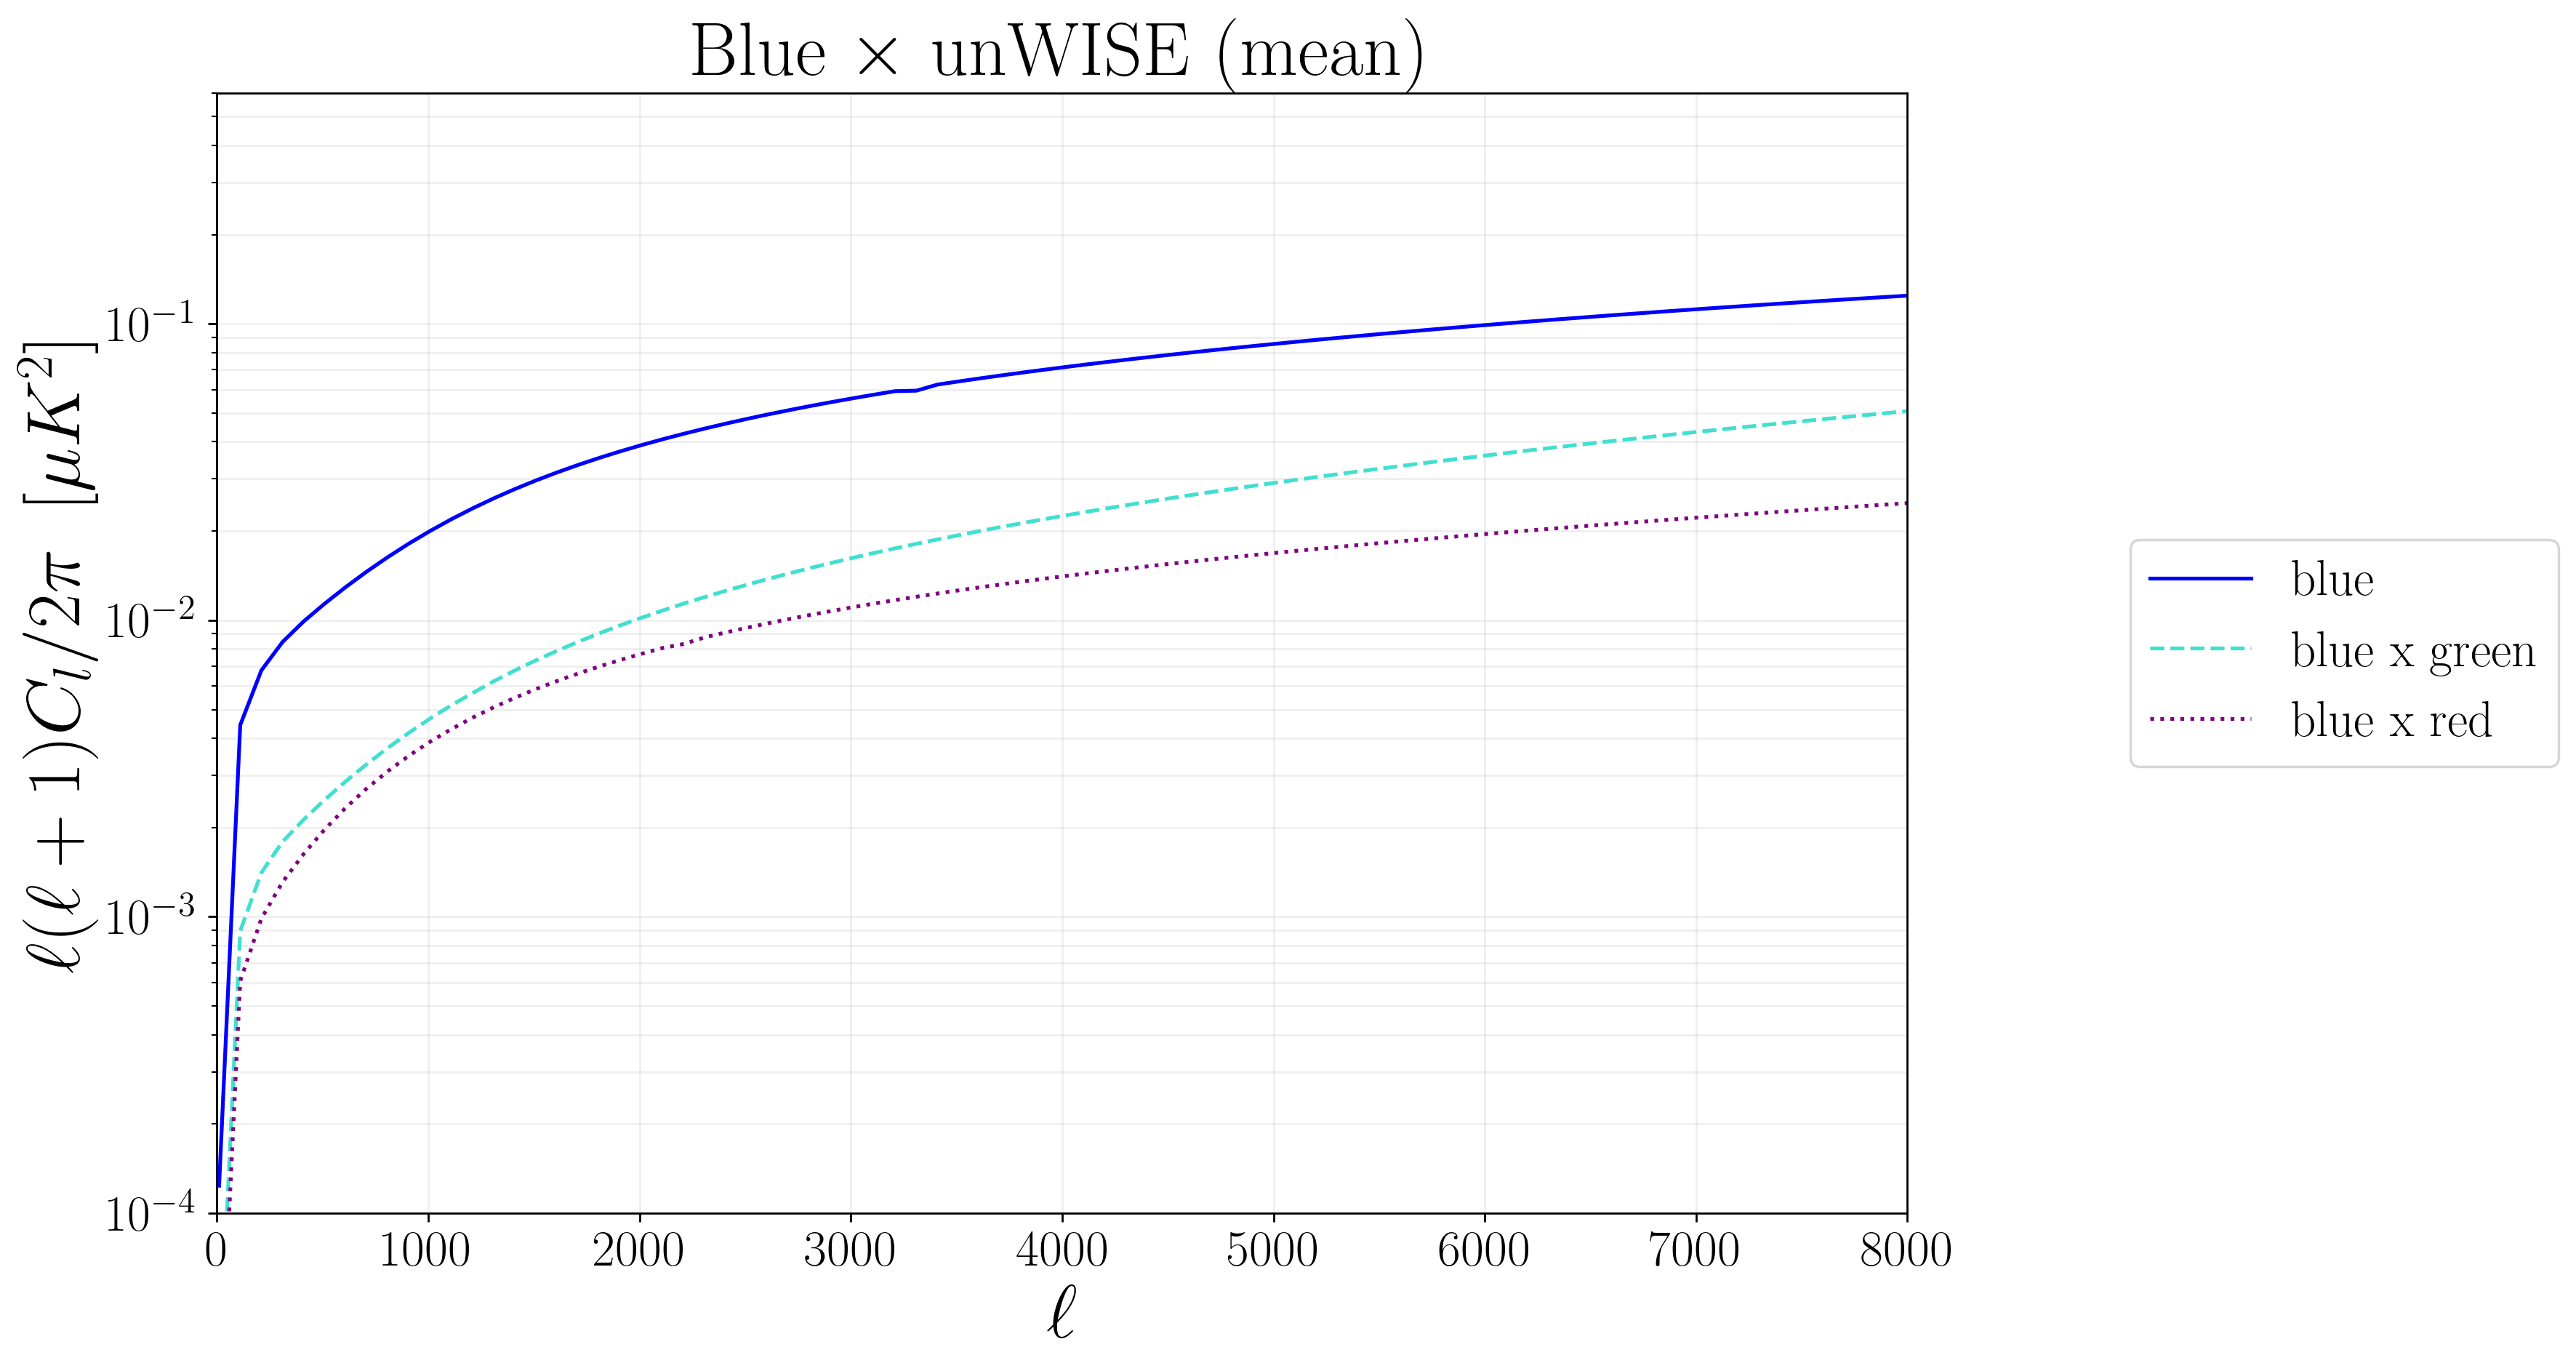

In [19]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(' Blue $\\times$ unWISE (%.8s)'%params, fontsize=30)


plt.plot(cl_gg_blue_ell, cl_gg_blue_tot, "-", color = "blue", label="blue")
plt.plot(cl_gg_blue_ell, cl_gg_blue_green_total, "--", color = "turquoise", label="blue x green")
plt.plot(cl_gg_blue_ell, cl_gg_blue_red_total, ":", color = "purple", label="blue x red")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 8.e3)
plt.ylim(1e-4,6.e-1)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


In [20]:
SN_blue = shot_noise_blue*np.ones(len(cl_gg_blue_ell))
SN_green = shot_noise_green*np.ones(len(cl_gg_blue_ell))
SN_red = shot_noise_red*np.ones(len(cl_gg_blue_ell))

SN_blue_green = shot_noise_blue_green *np.ones(len(cl_gg_blue_ell)) 
SN_green_red = shot_noise_green_red *np.ones(len(cl_gg_blue_ell)) 
SN_blue_red = shot_noise_blue_red *np.ones(len(cl_gg_blue_ell)) 

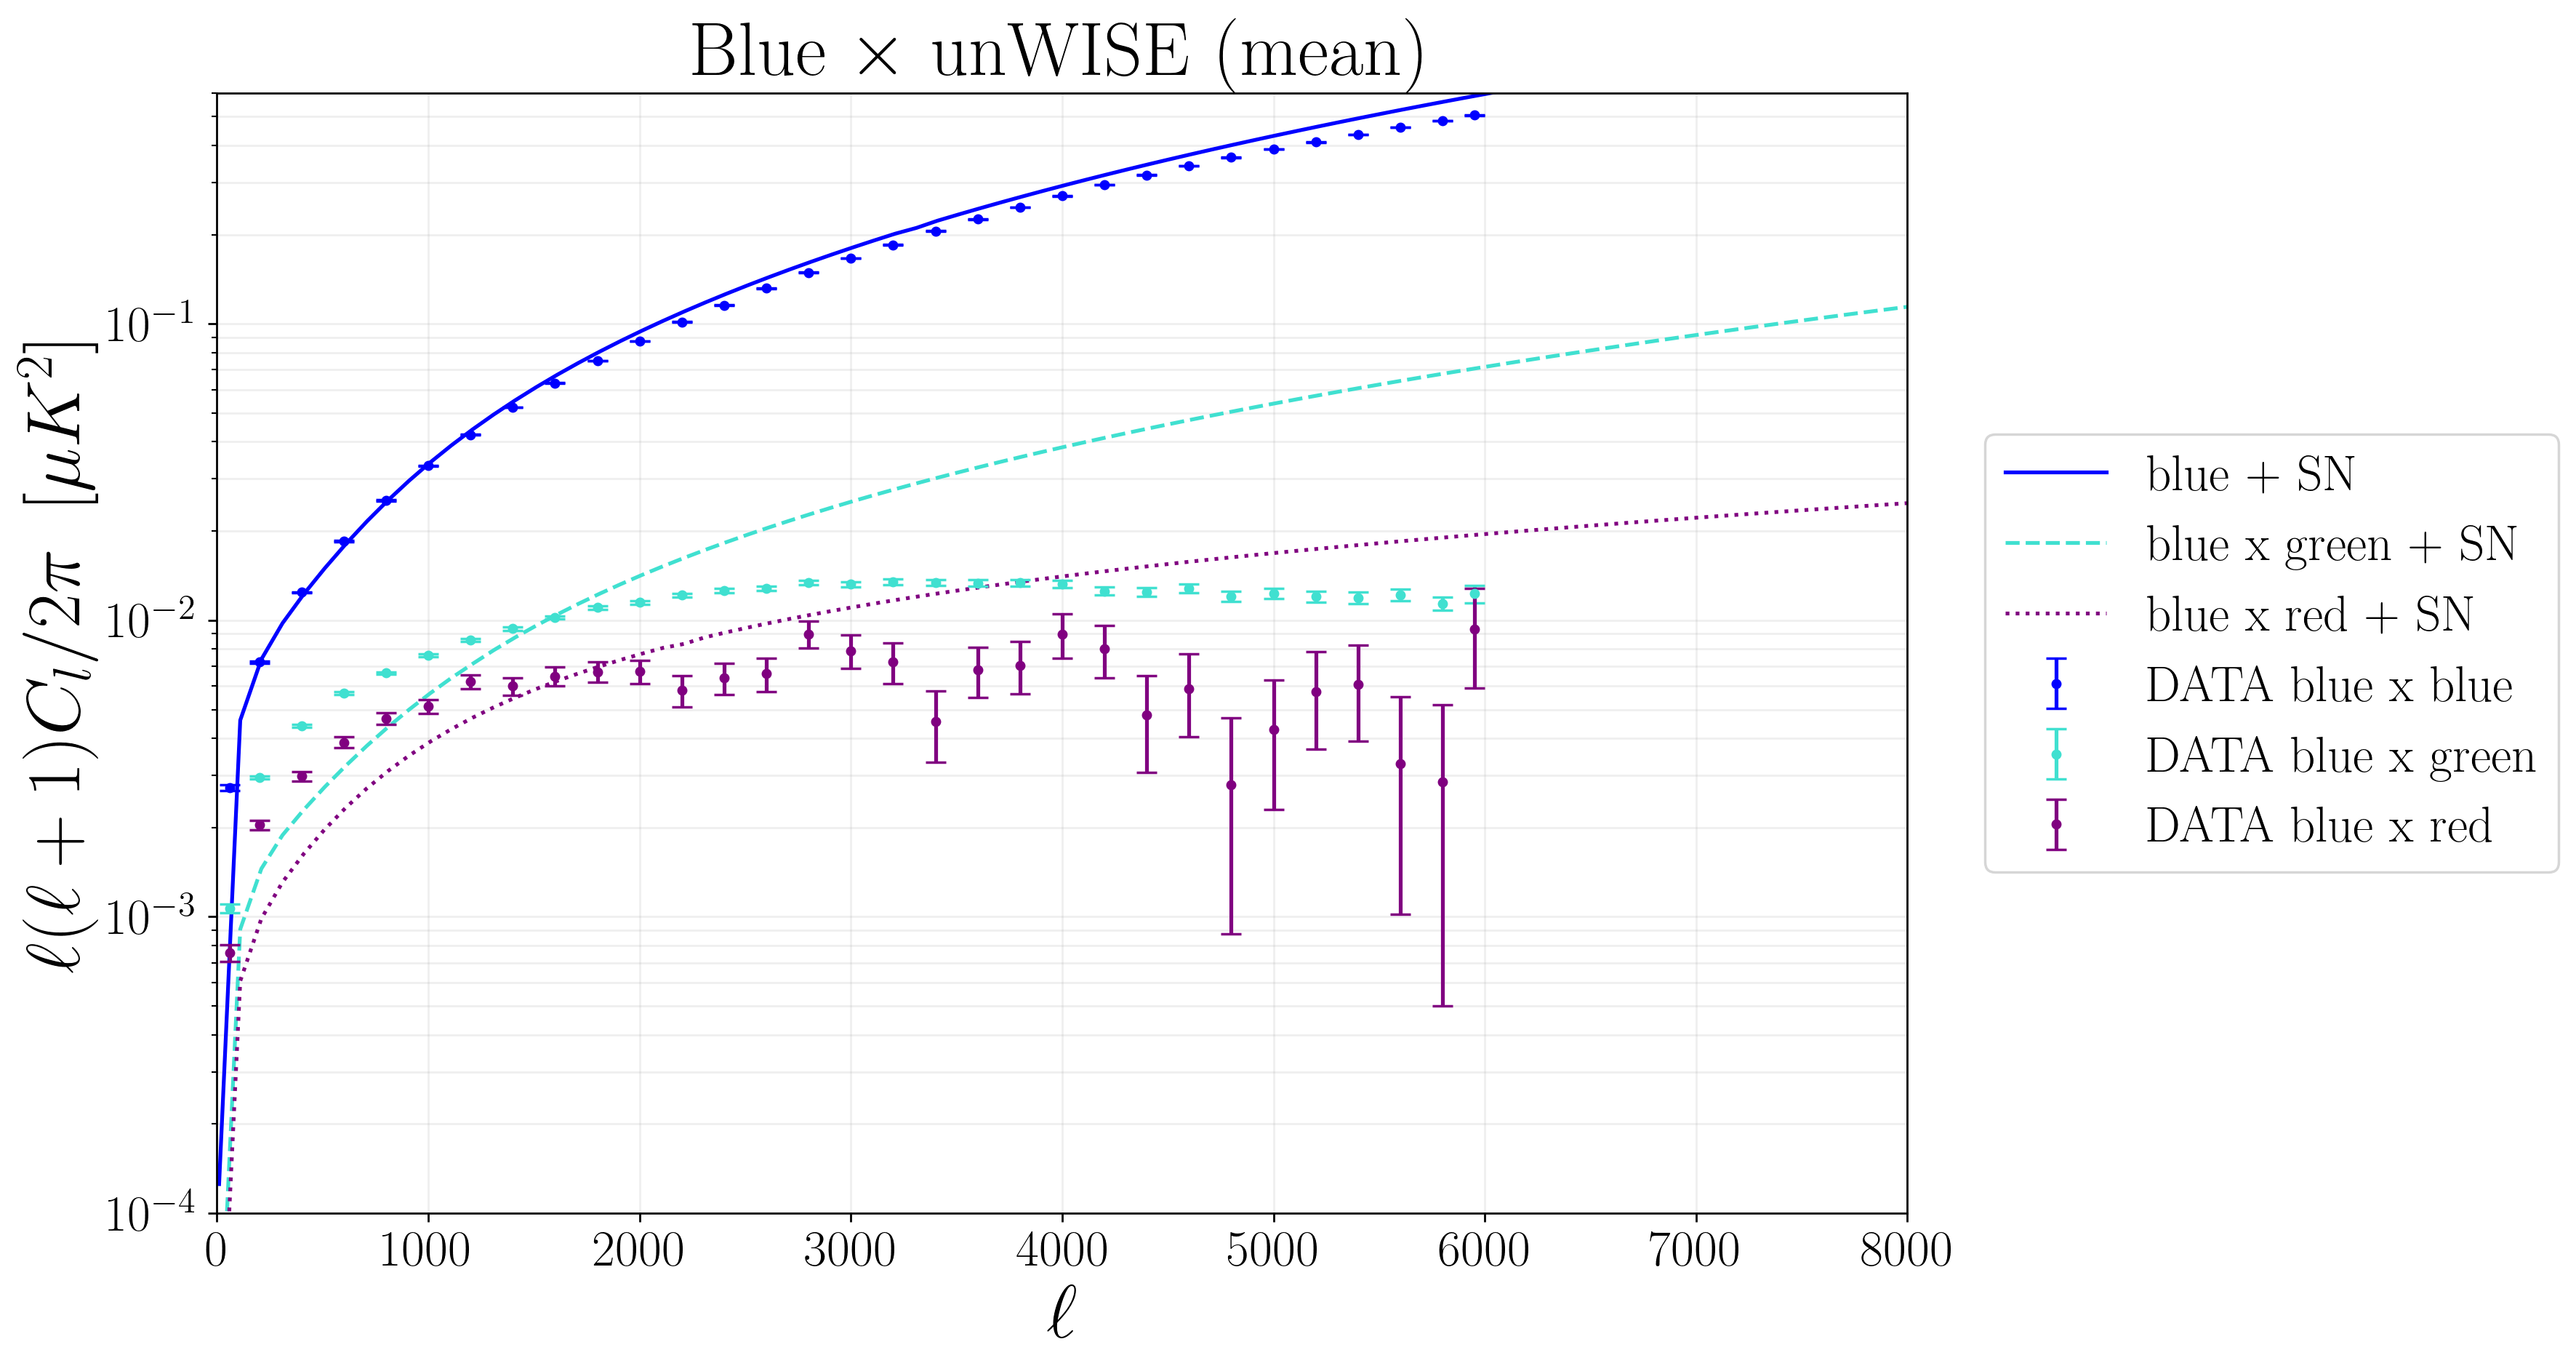

In [21]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(' Blue $\\times$ unWISE (%.8s)'%params, fontsize=30)

plt.plot(cl_gg_blue_ell, cl_gg_blue_tot+SN_blue*cl_to_dl_gg, "-", color = "blue", label="blue + SN")
plt.plot(cl_gg_blue_ell, cl_gg_blue_green_total+SN_blue_green*cl_to_dl_gg, "--", color = "turquoise", label="blue x green + SN")
plt.plot(cl_gg_blue_ell, cl_gg_blue_red_total+SN_blue_red*cl_to_dl_gg, ":", color = "purple", label="blue x red + SN ")

plt.errorbar(ell_gg_data_11, cl_gg_data_11, yerr = sigma_gg_data_11,  fmt= ".", color = "blue", capsize=4, label=" DATA blue x blue ")
plt.errorbar(ell_gg_data_12, cl_gg_data_12, yerr = sigma_gg_data_12,  fmt= ".", color = "turquoise", capsize=4, label=" DATA blue x green")
plt.errorbar(ell_gg_data_17, cl_gg_data_17, yerr = sigma_gg_data_17,  fmt= ".", color = "purple", capsize=4, label="DATA blue x red")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 8.e3)
plt.ylim(1e-4,6.e-1)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


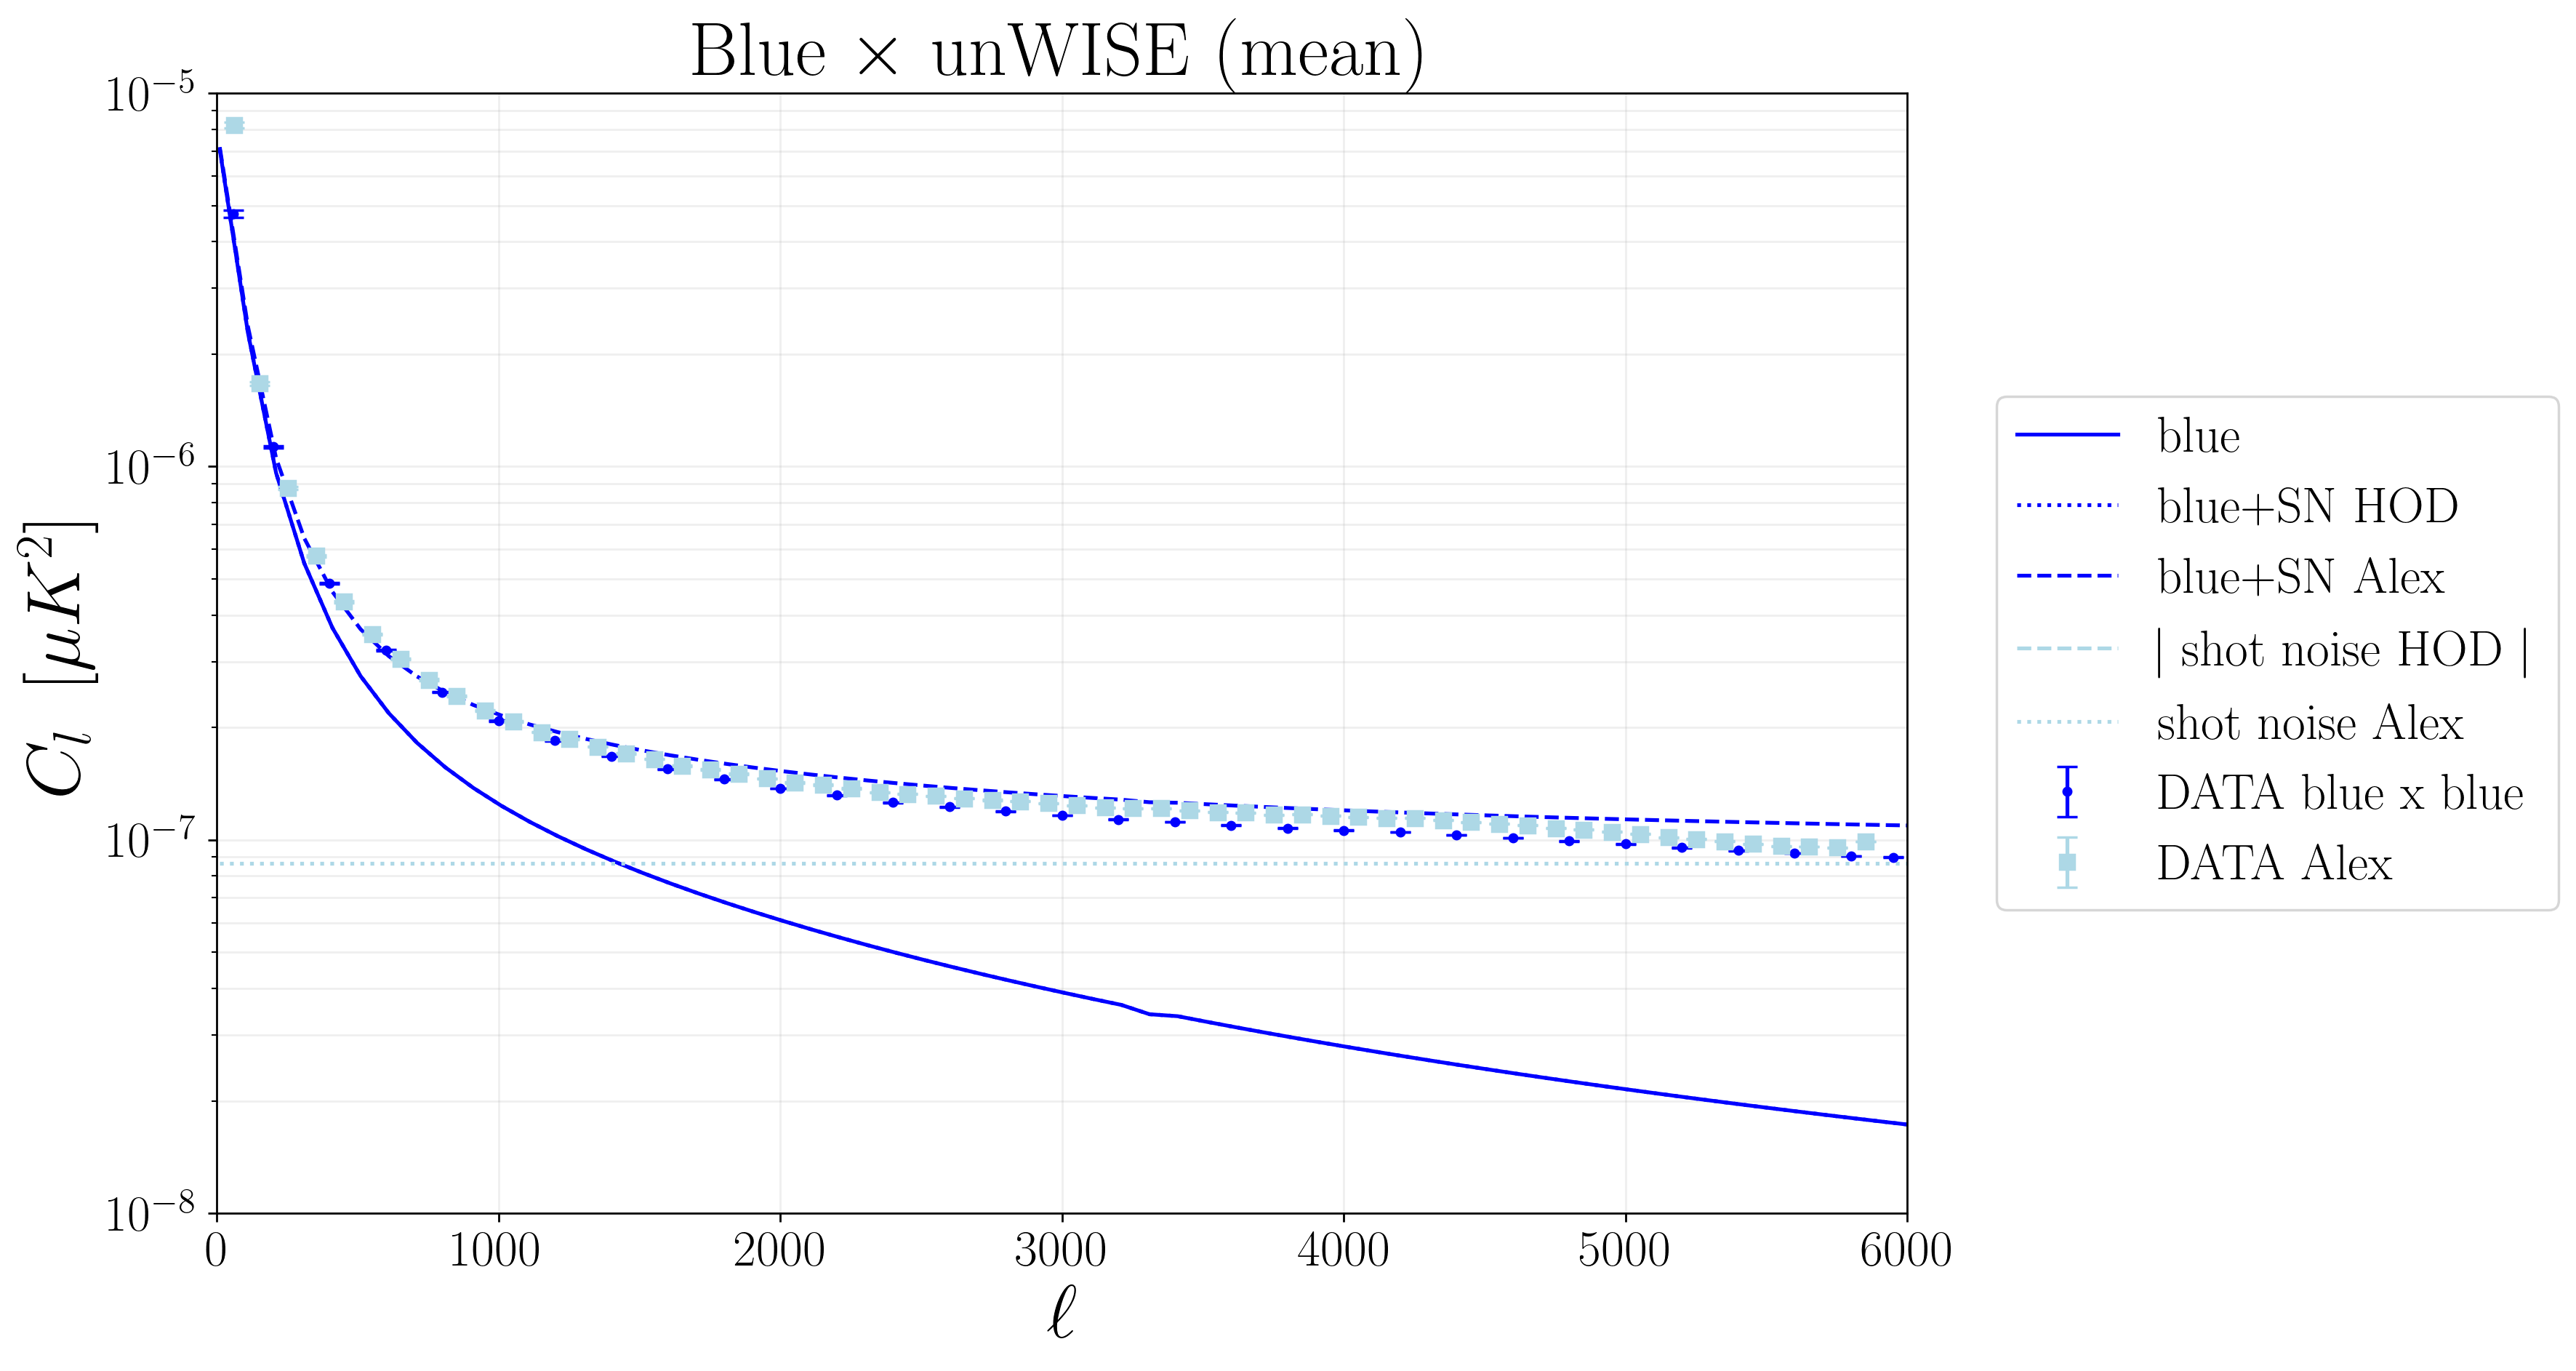

In [22]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$C_l  \,\,\, [\mu K^2]$", fontsize=30)
plt.title(' Blue $\\times$ unWISE (%.8s)'%params, fontsize=30)

#class-sz
plt.plot(cl_gg_blue_ell, cl_gg_blue_tot/cl_to_dl_gg, "-", color = "blue", label="blue")
plt.plot(cl_gg_blue_ell, cl_gg_blue_tot/cl_to_dl_gg+A_shot_noise_blue*1e-7, ":", color = "blue", label="blue+SN HOD")
plt.plot(cl_gg_blue_ell, cl_gg_blue_tot/cl_to_dl_gg+0.92e-7, "--", color = "blue", label="blue+SN Alex")
plt.plot(cl_gg_blue_ell, abs(A_shot_noise_blue*np.ones(len(cl_gg_blue_ell))*1e-7), "--", color = "lightblue", label="$|$ shot noise HOD $|$")
plt.plot(cl_gg_blue_ell, SN_blue, ":", color = "lightblue", label="shot noise Alex")

# plt.plot(cl_gg_blue_ell, cl_gg_blue_green/cl_to_dl_gg, "--", color = "turquoise", label="blue x green")
# plt.plot(cl_gg_blue_ell, cl_gg_blue_red/cl_to_dl_gg, ":", color = "purple", label="blue x red")


#Data
plt.errorbar(ell_gg_data_11, cl_gg_data_11/cl_to_dl_data, yerr = sigma_gg_data_11/cl_to_dl_data,  fmt= ".", color = "blue", capsize=4, label=" DATA blue x blue")
plt.errorbar(ell_alex_blue, cl_alex_blue, yerr = sigma_alex_blue,  fmt= "s", color = "lightblue", capsize=4, label=" DATA Alex")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 6.e3)
plt.ylim(1e-8,1.e-5)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


## Green x unWISE

In [23]:
K = Class()
K.set(green_HOD)
K.set(p18_pdict)
K.set(websky_tsz_pdict)
K.set(cib_pdict)
K.set(common_settings)



K.set({
        'output':'gal_gal_1h,gal_gal_2h,gal1_gal2_1h,gal1_gal2_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,gal1_lensmag2_1h,gal1_lensmag2_2h,gal2_lensmag1_1h,gal2_lensmag1_2h,lensmag1_lensmag2_1h, lensmag1_lensmag2_2h',
    
        #galaxy 1 
        'galaxy_sample1': green_HOD['galaxy_sample'],
        'galaxy_sample_id1': green_HOD['galaxy_sample_id'],
        'UNWISE_dndz_file1': green_HOD['UNWISE_dndz_file'],
    
        'sigma_log10M_HOD_gal1': green_HOD['sigma_log10M_HOD'],
        'alpha_s_HOD_gal1': green_HOD['alpha_s_HOD'],
        'M1_prime_HOD_gal1': green_HOD['M1_prime_HOD'],
        'M_min_HOD_gal1': green_HOD['M_min_HOD'],
        'x_out_truncated_nfw_profile_satellite_galaxies_gal1': green_HOD['x_out_truncated_nfw_profile_satellite_galaxies'],
        
        #galaxy 2 
        'galaxy_sample2': red_HOD['galaxy_sample'],
        'galaxy_sample_id2': red_HOD['galaxy_sample_id'],
        'UNWISE_dndz_file2': red_HOD['UNWISE_dndz_file'],
    
        'sigma_log10M_HOD_gal2': red_HOD['sigma_log10M_HOD'],
        'alpha_s_HOD_gal2': red_HOD['alpha_s_HOD'],
        'M1_prime_HOD_gal2': red_HOD['M1_prime_HOD'],
        'M_min_HOD_gal2': red_HOD['M_min_HOD'],
        'x_out_truncated_nfw_profile_satellite_galaxies_gal2': red_HOD['x_out_truncated_nfw_profile_satellite_galaxies'],
  
        })        
K.compute()

green_gg = K.cl_gg()
green_gm =K.cl_gm()
green_mm =K.cl_mm()

green_x_red_gg = K.cl_g1g2()
green_x_red_m1m2 = K.cl_m1m2()
green_x_red_g1m2 = K.cl_g1m2()
red_x_green_g2m1 = K.cl_g2m1()


In [24]:
cl_gg_green_ell = np.asarray(green_gg['ell'])
cl_gg_green_1h = np.asarray(green_gg['1h'])
cl_gg_green_2h = np.asarray(green_gg['2h'])
cl_gg_green = cl_gg_green_1h+cl_gg_green_2h

cl_to_dl_gg = cl_gg_green_ell*(cl_gg_green_ell+1)/2/np.pi

#lensing magnification terms
#gm
cl_gm_green_1h = np.asarray(green_gm['1h'])
cl_gm_green_2h = np.asarray(green_gm['2h'])
cl_gm_green = cl_gm_green_1h+cl_gm_green_2h
#mm
cl_mm_green_1h = np.asarray(green_mm['1h'])
cl_mm_green_2h = np.asarray(green_mm['2h'])
cl_mm_green = cl_mm_green_1h+cl_mm_green_2h

cl_gg_green_tot = cl_gg_green + 2*(5*s_green-2)*(cl_gm_green)  + (5*s_green-2)*(5*s_green-2)*(cl_mm_green)

In [25]:
"""
green x red
"""

cl_gg_green_red_ell = np.asarray(green_x_red_gg ['ell'])
cl_gg_green_red_1h = np.asarray(green_x_red_gg ['1h'])
cl_gg_green_red_2h = np.asarray(green_x_red_gg ['2h'])

cl_gg_green_red = cl_gg_green_red_1h + cl_gg_green_red_2h

#lensing magnification terms
#m1m2
cl_mm_green_red_ell = np.asarray(green_x_red_m1m2 ['ell'])
cl_mm_green_red_1h = np.asarray(green_x_red_m1m2 ['1h'])
cl_mm_green_red_2h = np.asarray(green_x_red_m1m2 ['2h'])

cl_mm_green_red = cl_mm_green_red_1h + cl_mm_green_red_2h


#g1m2
cl_g1m2_green_red_ell = np.asarray(green_x_red_g1m2 ['ell'])
cl_g1m2_green_red_1h = np.asarray(green_x_red_g1m2 ['1h'])
cl_g1m2_green_red_2h = np.asarray(green_x_red_g1m2 ['2h'])

cl_g1m2_green_red = cl_g1m2_green_red_1h + cl_g1m2_green_red_2h

#g2m1
cl_g2m1_red_x_green_ell = np.asarray(red_x_green_g2m1 ['ell'])
cl_g2m1_red_x_green_1h = np.asarray(red_x_green_g2m1 ['1h'])
cl_g2m1_red_x_green_2h = np.asarray(red_x_green_g2m1 ['2h'])

cl_g2m1_red_green = cl_g2m1_red_x_green_1h + cl_g2m1_red_x_green_2h

#all terms
cl_gg_green_red_total = cl_gg_green_red + (5*s_red-2)*cl_g1m2_green_red + (5*s_green-2)*cl_g2m1_red_green + (5*s_green-2)*(5*s_red-2)*cl_mm_green_red


In [26]:
cl_g1m2_green_red

array([4.65402032e-06, 1.56584469e-04, 2.57852180e-04, 3.26271678e-04,
       3.86376232e-04, 4.47777363e-04, 5.11506854e-04, 5.80344352e-04,
       6.53518295e-04, 7.31308753e-04, 8.13111858e-04, 8.98503207e-04,
       9.86993600e-04, 1.07810842e-03, 1.17143259e-03, 1.26657932e-03,
       1.36322184e-03, 1.46106930e-03, 1.55987852e-03, 1.65944160e-03,
       1.75958460e-03, 1.86016150e-03, 1.96105136e-03, 2.06215482e-03,
       2.16338937e-03, 2.26468806e-03, 2.36599590e-03, 2.46726870e-03,
       2.56846808e-03, 2.66956414e-03, 2.77053230e-03, 2.87135169e-03,
       2.97200452e-03, 3.07247502e-03, 3.17275177e-03, 3.27282238e-03,
       3.37267570e-03, 3.47230297e-03, 3.57169480e-03, 3.67084185e-03,
       3.76973590e-03, 3.86836871e-03, 3.96673235e-03, 4.06481824e-03,
       4.16261958e-03, 4.26012685e-03, 4.35733391e-03, 4.45423271e-03,
       4.55081563e-03, 4.64707535e-03, 4.74300469e-03, 4.83859665e-03,
       4.93384441e-03, 5.02874139e-03, 5.12328122e-03, 5.21745771e-03,
      

In [27]:
cl_g2m1_red_green

array([1.83512999e-06, 4.59032754e-05, 7.97640283e-05, 1.09464702e-04,
       1.41095549e-04, 1.74039281e-04, 2.08214667e-04, 2.42832959e-04,
       2.77458463e-04, 3.11556629e-04, 3.44868591e-04, 3.77171653e-04,
       4.08299917e-04, 4.38268955e-04, 4.67071625e-04, 4.94845943e-04,
       5.21305637e-04, 5.46879955e-04, 5.71536340e-04, 5.95432723e-04,
       6.18447763e-04, 6.40793431e-04, 6.62564772e-04, 6.83792437e-04,
       7.04536176e-04, 7.24885823e-04, 7.44772828e-04, 7.64354693e-04,
       7.83628858e-04, 8.02715932e-04, 8.21415371e-04, 8.39900464e-04,
       8.58218901e-04, 8.76418425e-04, 8.94313435e-04, 9.12116401e-04,
       9.30267170e-04, 9.47289618e-04, 9.64678310e-04, 9.81944787e-04,
       9.99095072e-04, 1.01613403e-03, 1.03306677e-03, 1.04989587e-03,
       1.06662620e-03, 1.08325980e-03, 1.09979784e-03, 1.11624750e-03,
       1.13260536e-03, 1.14887644e-03, 1.16506105e-03, 1.18115990e-03,
       1.19717584e-03, 1.21310914e-03, 1.22896172e-03, 1.24473440e-03,
      

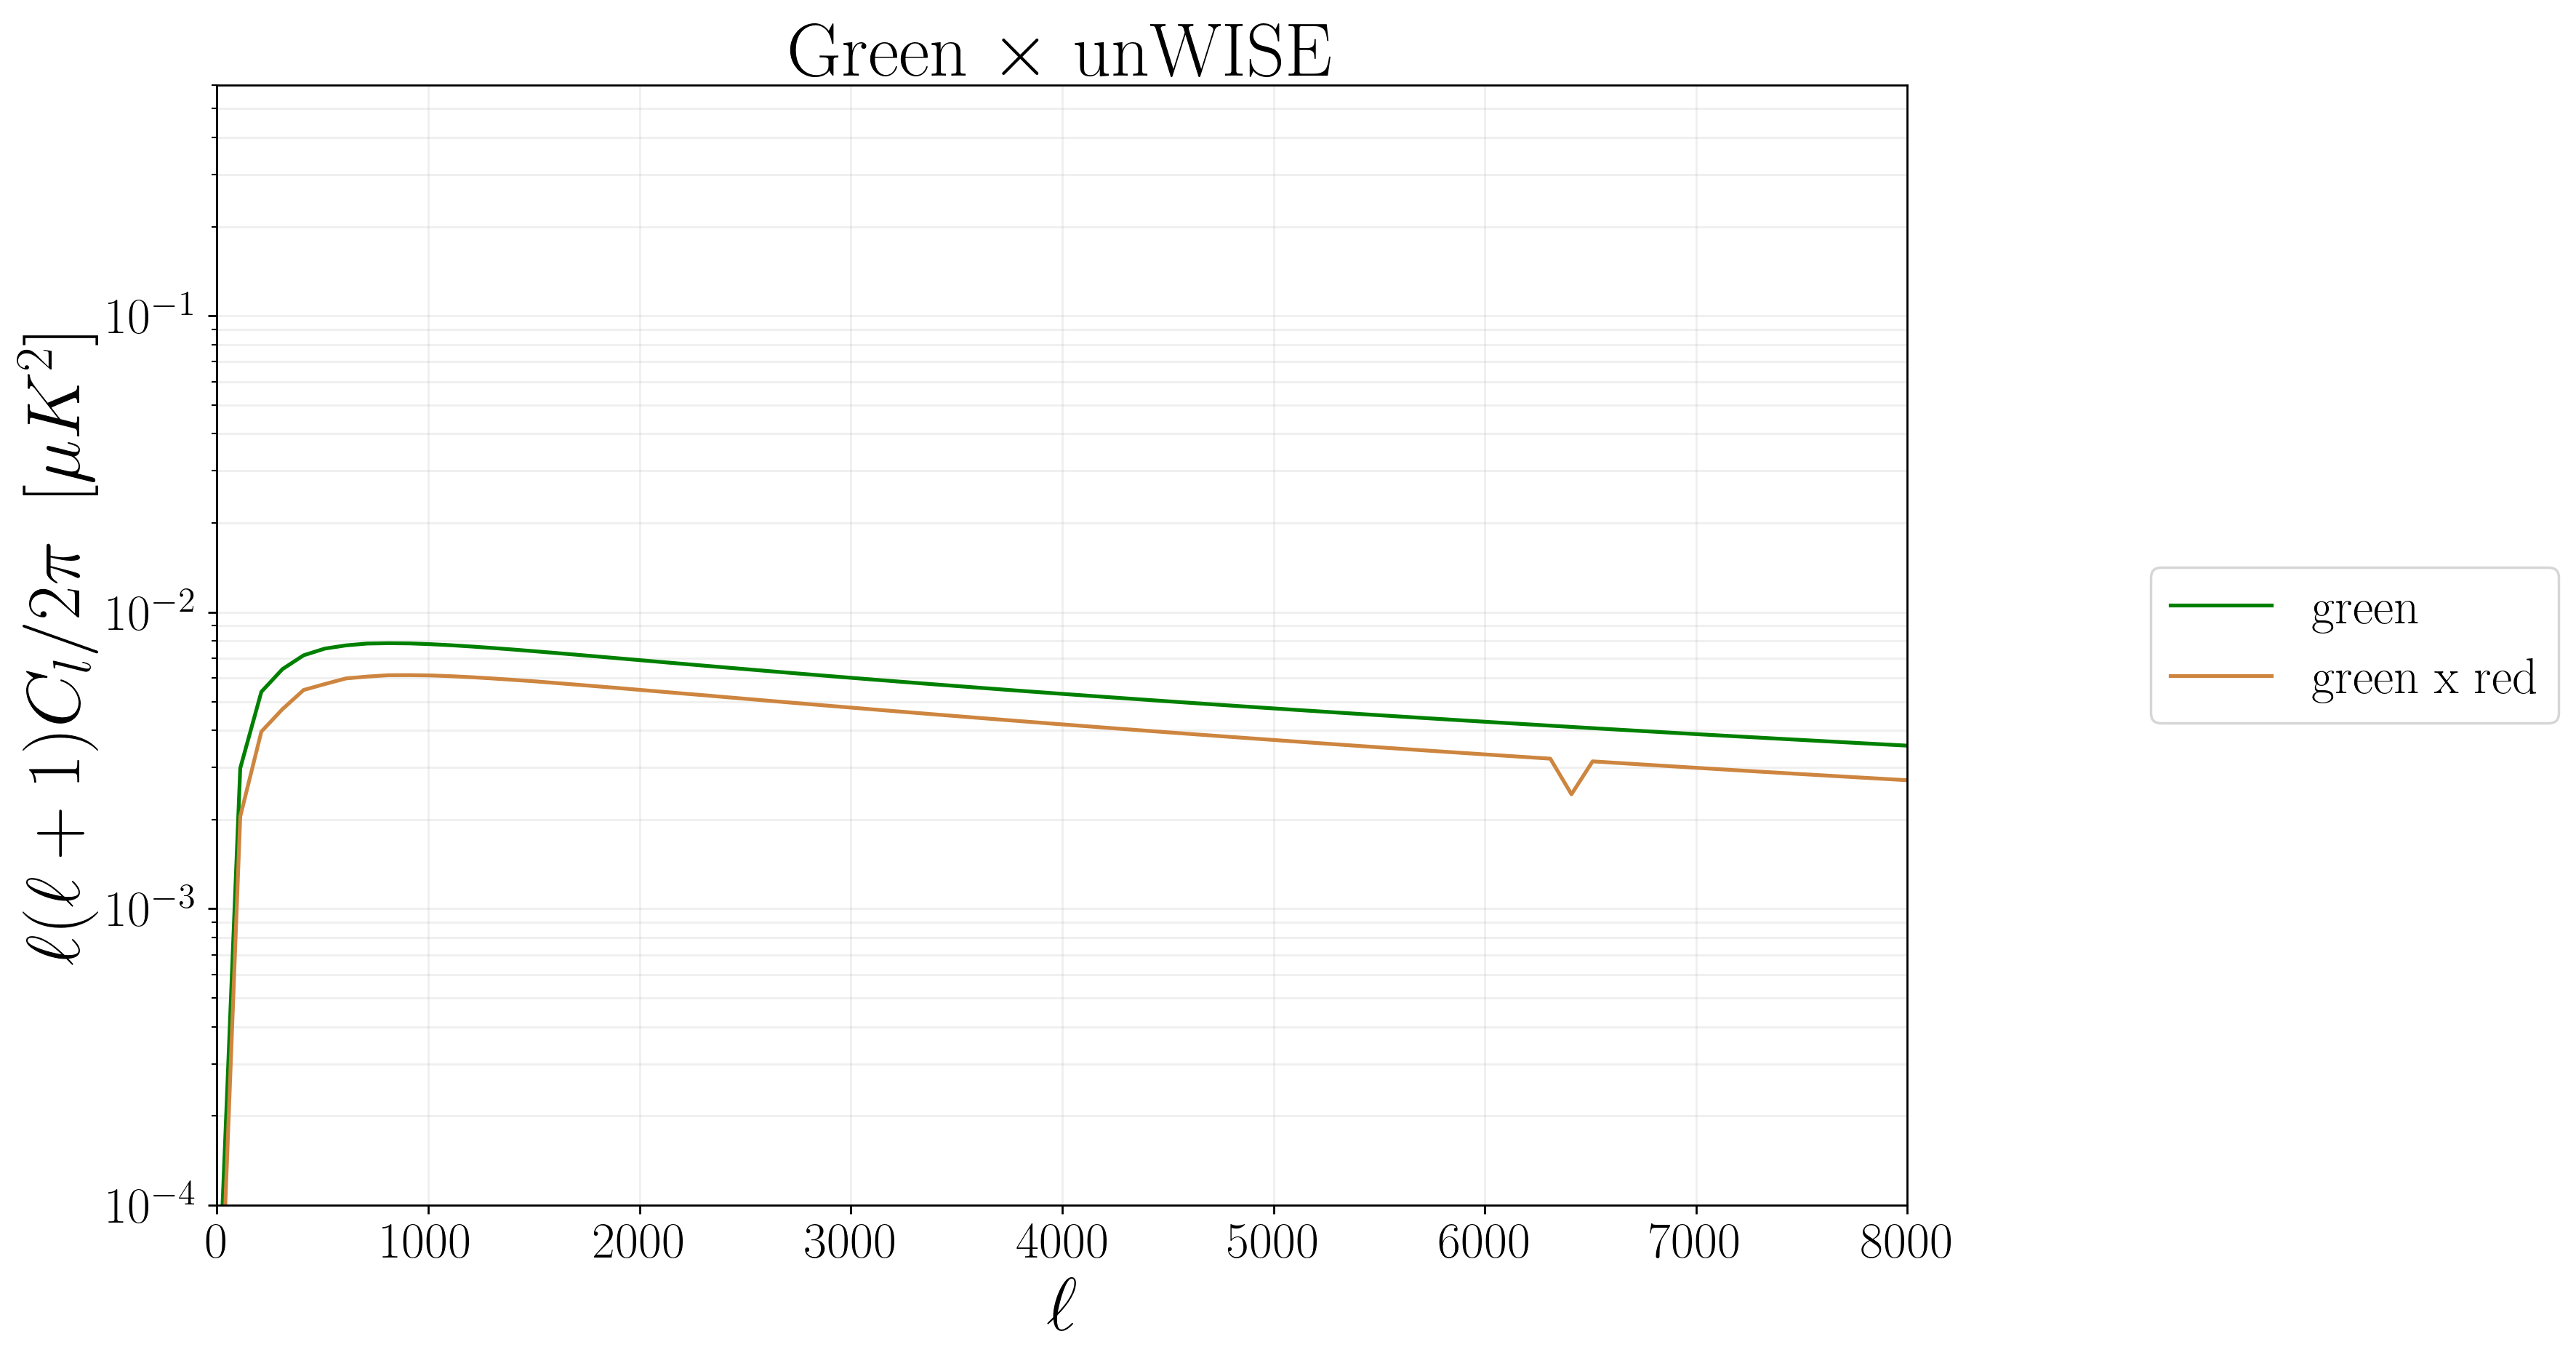

In [28]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(' Green $\\times$ unWISE', fontsize=30)


plt.plot(cl_gg_green_ell, cl_gg_green_2h, "-", color = "green", label="green")
#plt.plot(cl_gg_green_ell, cl_gg_blue_green, "-", color = "turquoise", label="blue x green")
plt.plot(cl_gg_green_ell, cl_gg_green_red_2h, "-", color = "peru", label="green x red")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 8.e3)
plt.ylim(1e-4,6.e-1)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


/var/folders/nb/92bp6wq92qg_000bg2y5tcm00000gn/T/ipykernel_28860/2693776803.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(1e-4,0)


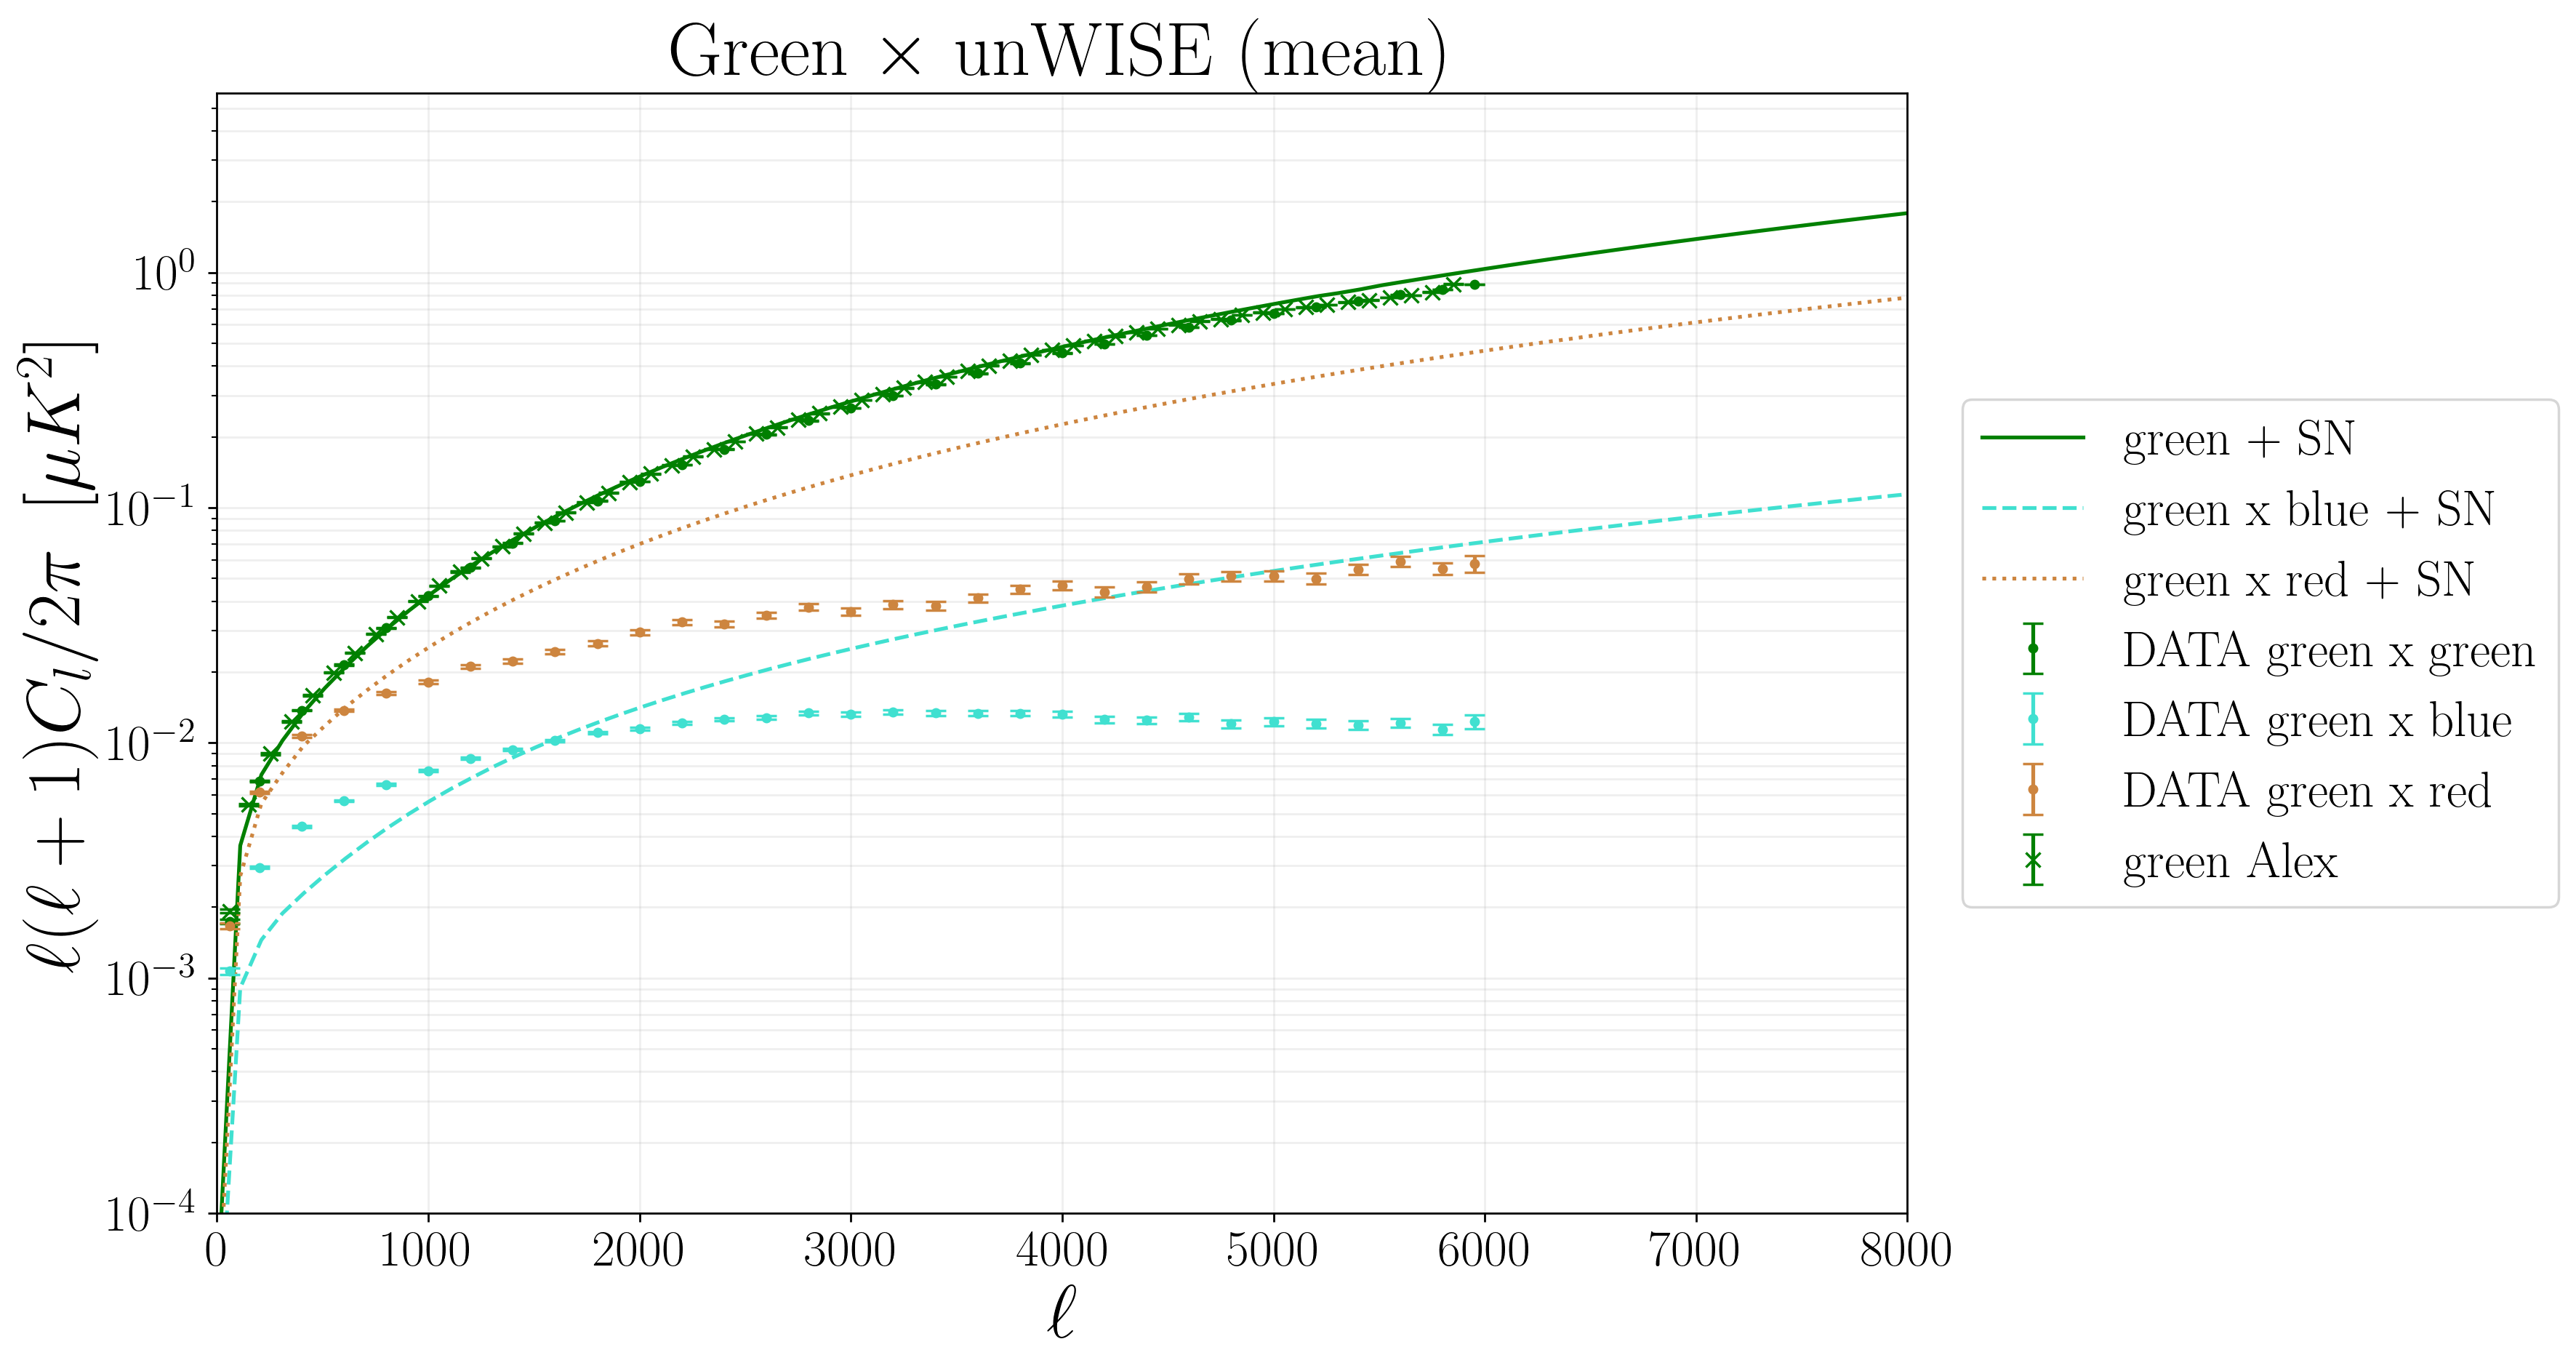

In [29]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(' Green $\\times$ unWISE (%.8s)'%params, fontsize=30)


plt.plot(cl_gg_green_ell, cl_gg_green_tot +SN_green*cl_to_dl_gg, "-", color = "green", label="green + SN")
plt.plot(cl_gg_green_ell, cl_gg_blue_green_total+ SN_blue_green*cl_to_dl_gg, "--", color = "turquoise", label="green x blue + SN")
plt.plot(cl_gg_green_ell, cl_gg_green_red_total+SN_green_red*cl_to_dl_gg, ":", color = "peru", label="green x red + SN")

plt.errorbar(ell_gg_data_22, cl_gg_data_22, yerr = sigma_gg_data_22,  fmt= ".", color = "green", capsize=4, label=" DATA green x green")
plt.errorbar(ell_gg_data_12, cl_gg_data_12, yerr = sigma_gg_data_12,  fmt= ".", color = "turquoise", capsize=4, label=" DATA green x blue ")
plt.errorbar(ell_gg_data_27, cl_gg_data_27, yerr = sigma_gg_data_27,  fmt= ".", color = "peru", capsize=4, label="DATA green x red")
plt.errorbar(ell_alex_green, cl_alex_green*cl_to_dl_alex, yerr =sigma_alex_green*cl_to_dl_alex, fmt= "x", color = "green", capsize=4, label=" green Alex")


plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 8.e3)
plt.ylim(1e-4,0)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


## Red x unWISE

In [30]:
L = Class()
L.set(red_HOD)
L.set(p18_pdict)
L.set(websky_tsz_pdict)
L.set(cib_pdict)
L.set(common_settings)



L.set({
        'output':'gal_gal_1h,gal_gal_2h,gal1_gal2_1h,gal1_gal2_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,gal1_lensmag2_1h,gal1_lensmag2_2h,gal2_lensmag1_1h,gal2_lensmag1_2h,lensmag1_lensmag2_1h, lensmag1_lensmag2_2h',
    
       })        
L.compute()

red_gg = L.cl_gg()
red_gm =L.cl_gm()
red_mm =L.cl_mm()


In [31]:
cl_gg_red_ell = np.asarray(red_gg['ell'])
cl_gg_red_1h = np.asarray(red_gg['1h'])
cl_gg_red_2h = np.asarray(red_gg['2h'])
cl_gg_red = cl_gg_red_1h+cl_gg_red_2h

cl_to_dl_gg = cl_gg_red_ell*(cl_gg_red_ell+1)/2/np.pi

#lensing magnification terms
#gm
cl_gm_red_1h = np.asarray(red_gm['1h'])
cl_gm_red_2h = np.asarray(red_gm['2h'])
cl_gm_red = cl_gm_red_1h+cl_gm_red_2h
#mm
cl_mm_red_1h = np.asarray(red_mm['1h'])
cl_mm_red_2h = np.asarray(red_mm['2h'])
cl_mm_red = cl_mm_red_1h+cl_mm_red_2h

cl_gg_red_tot = cl_gg_red + 2*(5*s_red-2)*(cl_gm_red)  + (5*s_red-2)*(5*s_red-2)*(cl_mm_red)

/var/folders/nb/92bp6wq92qg_000bg2y5tcm00000gn/T/ipykernel_28860/1533860125.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(1e-4,0)


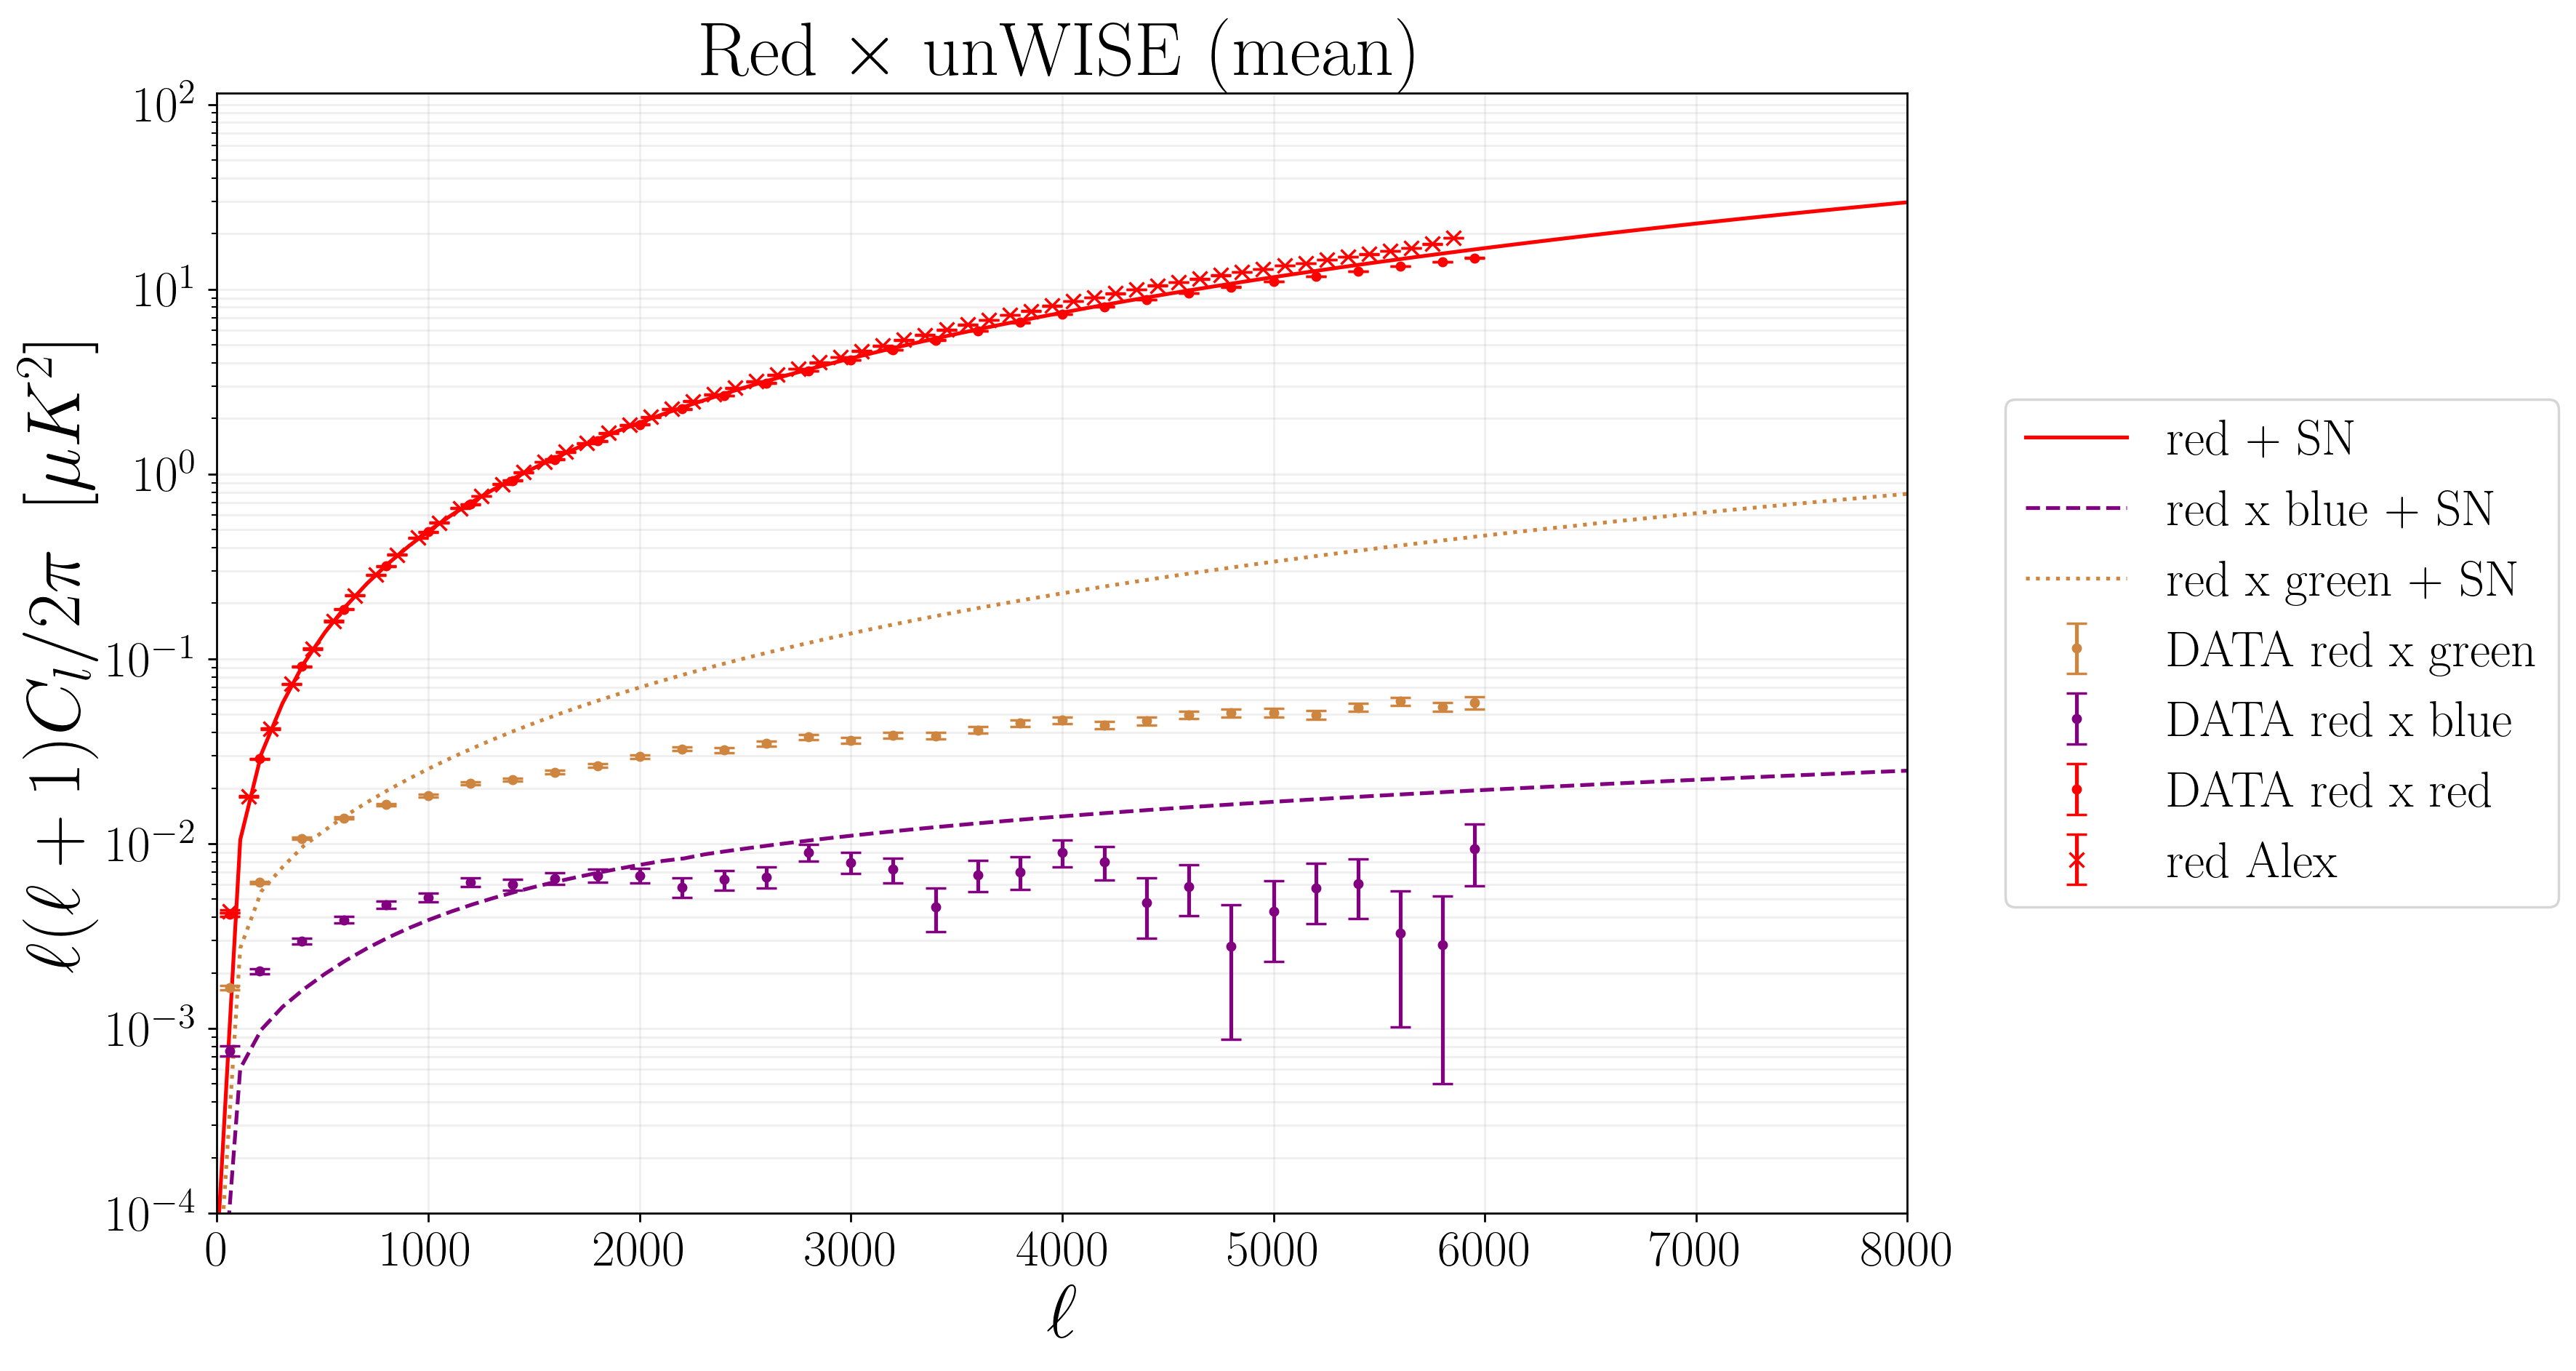

In [32]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"$\ell (\ell+1) C_l / 2 \pi \,\,\, [\mu K^2]$", fontsize=30)
plt.title(' Red $\\times$ unWISE (%.8s)'%params, fontsize=30)


plt.plot(cl_gg_green_ell, cl_gg_red_tot +SN_red*cl_to_dl_gg, "-", color = "red", label="red + SN")
plt.plot(cl_gg_green_ell, cl_gg_blue_red_total +SN_blue_red*cl_to_dl_gg, "--", color = "purple", label="red x blue + SN")
plt.plot(cl_gg_green_ell, cl_gg_green_red_total+SN_green_red*cl_to_dl_gg, ":", color = "peru", label="red x green + SN")

plt.errorbar(ell_gg_data_27, cl_gg_data_27, yerr = sigma_gg_data_27,  fmt= ".", color = "peru", capsize=4, label=" DATA red x green")
plt.errorbar(ell_gg_data_17, cl_gg_data_17, yerr = sigma_gg_data_17,  fmt= ".", color = "purple", capsize=4, label="DATA red x blue")
plt.errorbar(ell_gg_data_77, cl_gg_data_77, yerr = sigma_gg_data_77,  fmt= ".", color = "red", capsize=4, label="DATA red x red")

plt.errorbar(ell_alex_red, cl_alex_red*cl_to_dl_alex, yerr =sigma_alex_red*cl_to_dl_alex, fmt= "x", color = "red", capsize=4, label=" red Alex")

plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 8.e3)
plt.ylim(1e-4,0)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


# Save 

In [33]:
path_save = "/Users/aleksandra/software/ILC_class-sz_curves_data/1-23/"

np.savetxt(path_save+"ell_dl_gxg_blue_x_blue.txt", (cl_gg_blue_ell, cl_gg_blue))
np.savetxt(path_save+"ell_dl_gxg_green_x_green.txt", (cl_gg_green_ell, cl_gg_green))
np.savetxt(path_save+"ell_dl_gxg_red_x_red.txt", (cl_gg_red_ell, cl_gg_red))

np.savetxt(path_save+"ell_dl_gxg_blue_x_red.txt", (cl_gg_blue_ell, cl_gg_blue_red))
np.savetxt(path_save+"ell_dl_gxg_red_x_blue.txt", (cl_gg_blue_ell, cl_gg_blue_red))

np.savetxt(path_save+"ell_dl_gxg_green_x_red.txt", (cl_gg_blue_ell, cl_gg_green_red))
np.savetxt(path_save+"ell_dl_gxg_red_x_green.txt", (cl_gg_blue_ell, cl_gg_green_red))

np.savetxt(path_save+"ell_dl_gxg_blue_x_green.txt", (cl_gg_blue_ell, cl_gg_blue_green))
np.savetxt(path_save+"ell_dl_gxg_green_x_blue.txt", (cl_gg_blue_ell, cl_gg_blue_green))


#lensmag
np.savetxt(path_save+"ell_dl_mxm_blue_x_blue.txt", (cl_gg_blue_ell, cl_mm_blue))
np.savetxt(path_save+"ell_dl_mxm_green_x_green.txt", (cl_gg_blue_ell, cl_mm_green))
np.savetxt(path_save+"ell_dl_mxm_red_x_red.txt", (cl_gg_blue_ell, cl_mm_red))

np.savetxt(path_save+"ell_dl_gxm_blue_x_green.txt", (cl_gg_blue_ell, cl_g1m2_blue_green))
np.savetxt(path_save+"ell_dl_gxm_blue_x_red.txt", (cl_gg_blue_ell, cl_g1m2_blue_red))
np.savetxt(path_save+"ell_dl_gxm_green_x_red.txt", (cl_gg_blue_ell, cl_g1m2_green_red))
np.savetxt(path_save+"ell_dl_gxm_green_x_blue.txt", (cl_gg_blue_ell, cl_g2m1_green_blue))
np.savetxt(path_save+"ell_dl_gxm_red_x_green.txt", (cl_gg_blue_ell, cl_g2m1_red_green))
np.savetxt(path_save+"ell_dl_gxm_red_x_blue.txt", (cl_gg_blue_ell, cl_g2m1_red_blue))

In [34]:
np.savetxt(path_save+"ell_dl_gxg_wLensmag_blue_x_blue.txt", (cl_gg_blue_ell, cl_gg_blue_tot))
np.savetxt(path_save+"ell_dl_gxg_wLensmag_green_x_green.txt", (cl_gg_green_ell, cl_gg_green_tot))
np.savetxt(path_save+"ell_dl_gxg_wLensmag_red_x_red.txt", (cl_gg_red_ell, cl_gg_red_tot))

np.savetxt(path_save+"ell_dl_gxg_wLensmag_blue_x_red.txt", (cl_gg_blue_ell, cl_gg_blue_red_total))
np.savetxt(path_save+"ell_dl_gxg_wLensmag_red_x_blue.txt", (cl_gg_blue_ell, cl_gg_blue_red_total))

np.savetxt(path_save+"ell_dl_gxg_wLensmag_green_x_red.txt", (cl_gg_blue_ell, cl_gg_green_red_total))
np.savetxt(path_save+"ell_dl_gxg_wLensmag_red_x_green.txt", (cl_gg_blue_ell, cl_gg_green_red_total))

np.savetxt(path_save+"ell_dl_gxg_wLensmag_blue_x_green.txt", (cl_gg_blue_ell, cl_gg_blue_green_total))
np.savetxt(path_save+"ell_dl_gxg_wLensmag_green_x_blue.txt", (cl_gg_blue_ell, cl_gg_blue_green_total))


# correlation coeff

In [35]:
#corr coeff from data
corr27_data = cl_gg_data_27/ np.sqrt(cl_gg_data_77*cl_gg_data_22)
corr12_data = cl_gg_data_12/ np.sqrt(cl_gg_data_11*cl_gg_data_22)
corr17_data = cl_gg_data_17/ np.sqrt(cl_gg_data_77*cl_gg_data_11)
    
#class_sz
corr12 = (cl_gg_blue_green_total +SN_blue_green*cl_to_dl_gg) /np.sqrt((cl_gg_blue_tot +SN_blue*cl_to_dl_gg)*(cl_gg_green_tot +SN_green*cl_to_dl_gg))
corr17 = (cl_gg_blue_red_total +SN_blue_red*cl_to_dl_gg) /np.sqrt((cl_gg_blue_tot +SN_blue*cl_to_dl_gg)*(cl_gg_red_tot +SN_red*cl_to_dl_gg))
corr27 = (cl_gg_green_red_total +SN_green_red*cl_to_dl_gg) /np.sqrt((cl_gg_green_tot +SN_green*cl_to_dl_gg)*(cl_gg_red_tot +SN_red*cl_to_dl_gg))



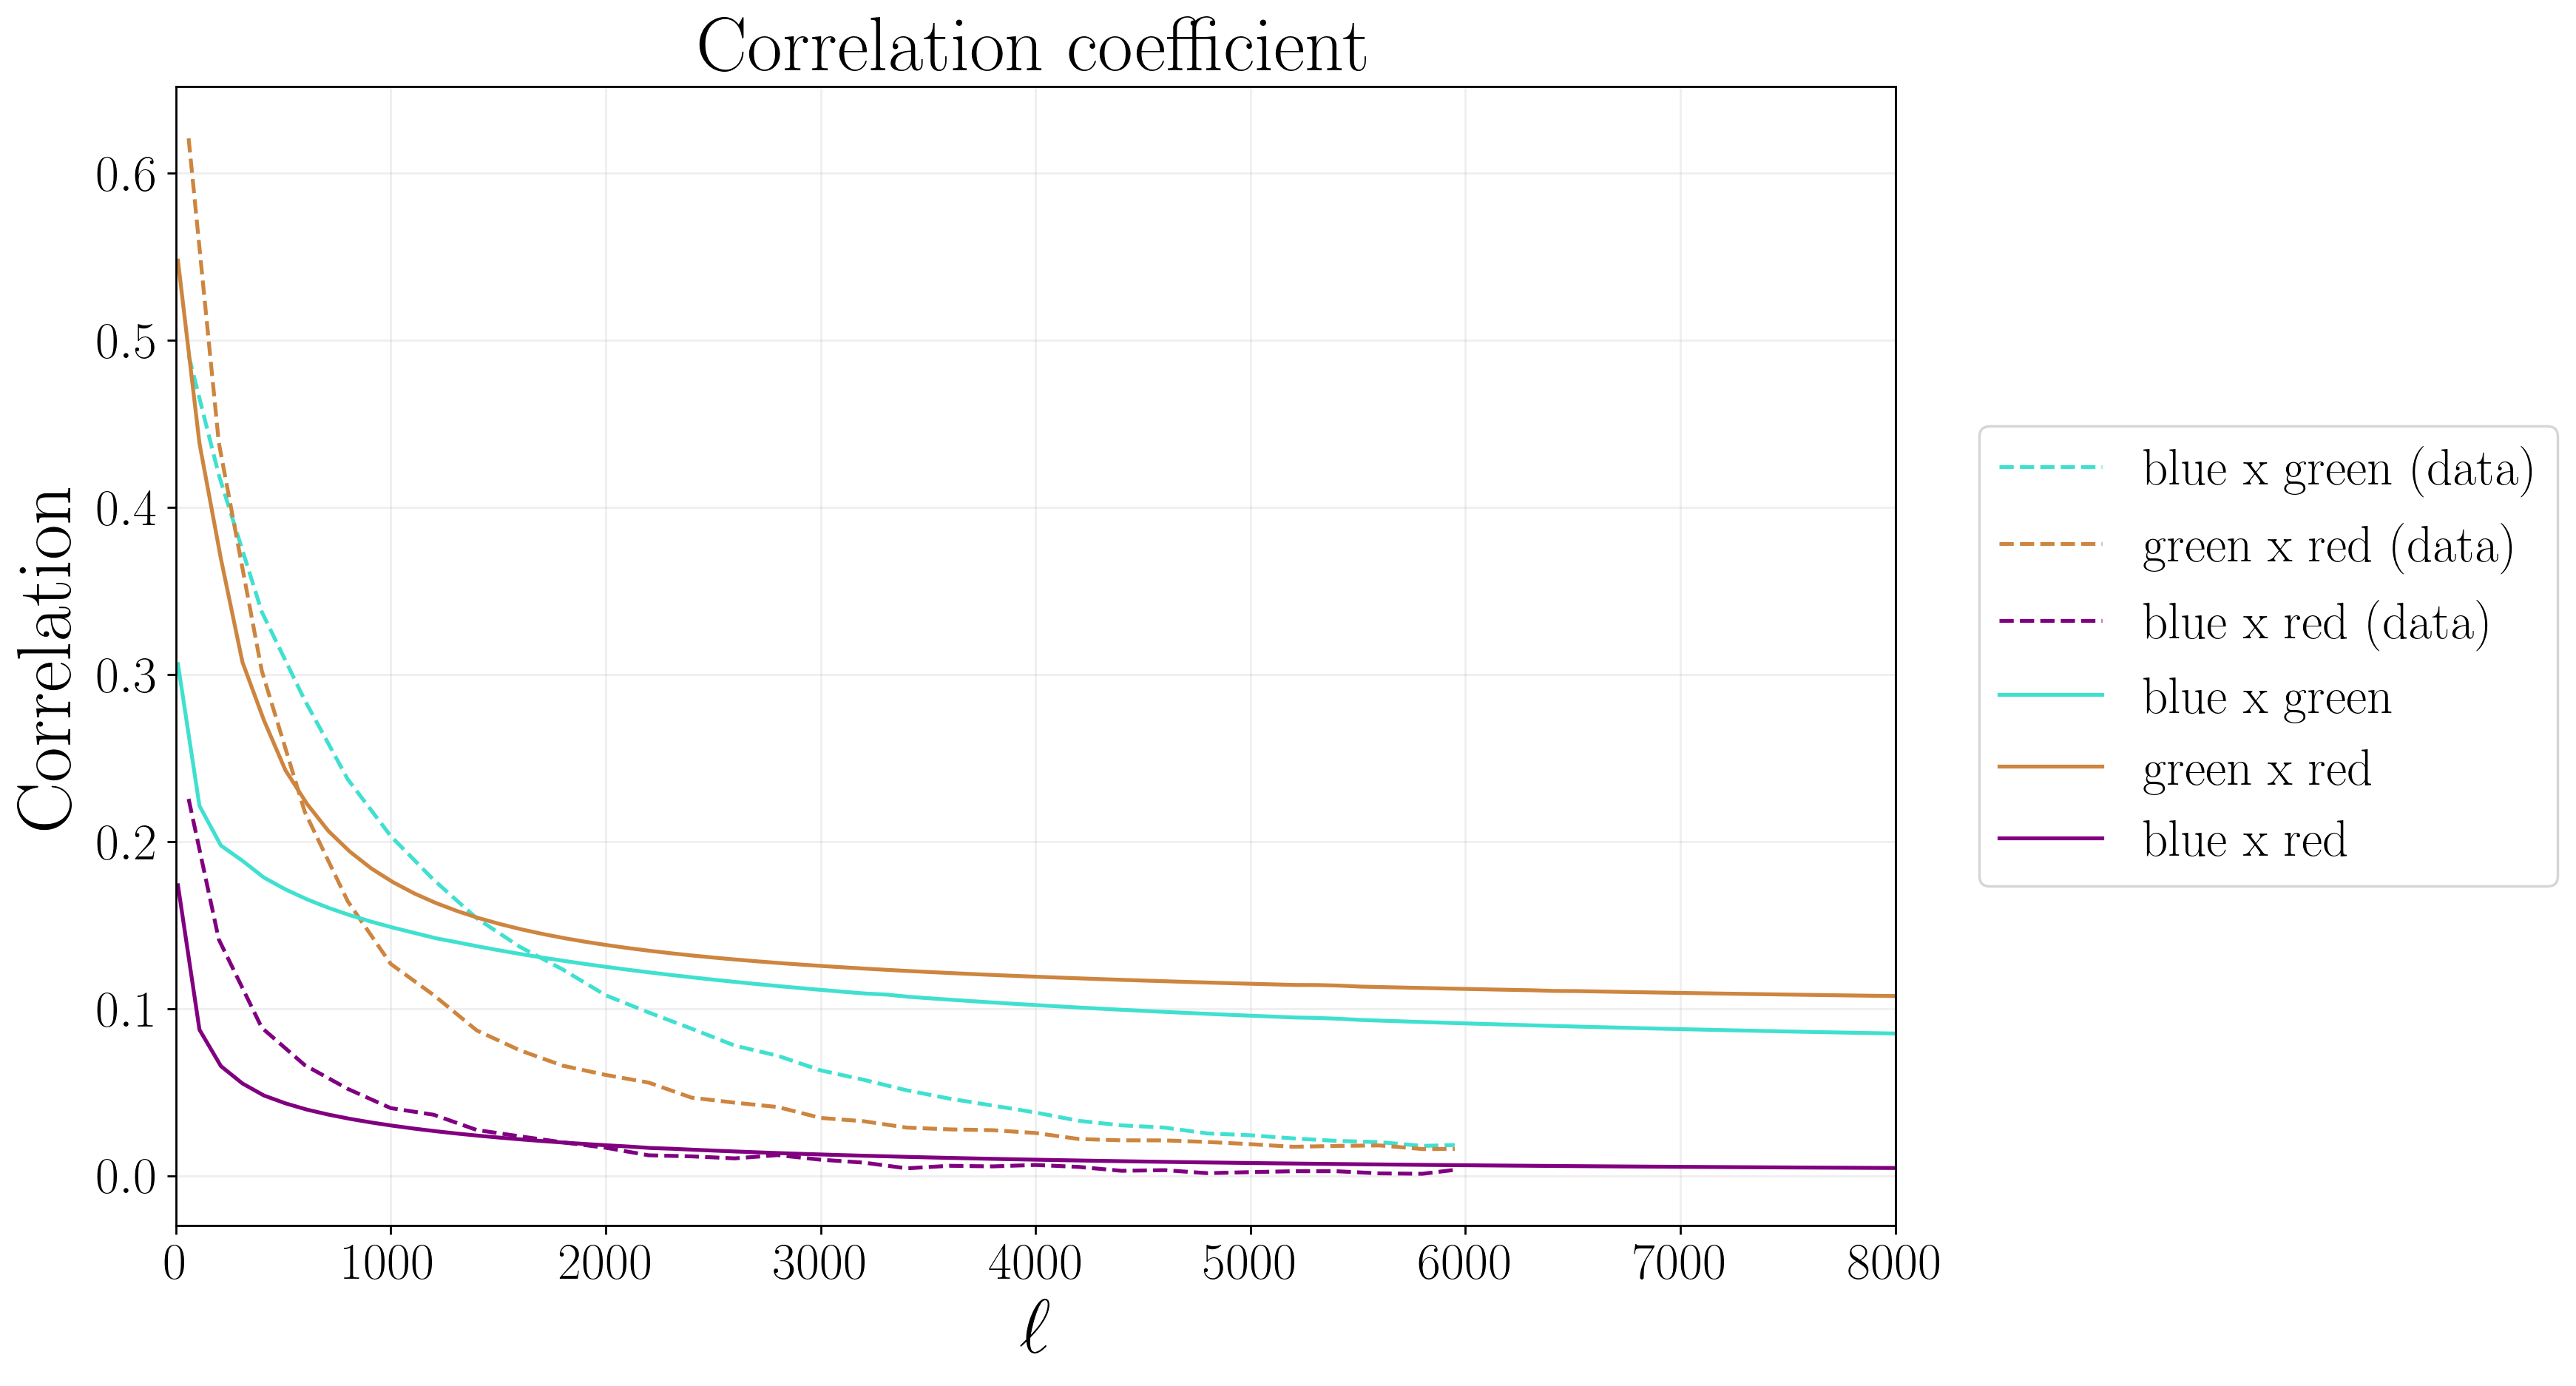

In [36]:
plt.figure(figsize=(12,8), dpi=250)
plt.xlabel(r"$\ell$", fontsize=30)
plt.ylabel(r"Correlation", fontsize=30)
plt.title('Correlation coefficient', fontsize=30)


plt.plot(ell_gg_data_27, corr12_data, "--", color = "turquoise", label=" blue x green (data)")
plt.plot(ell_gg_data_27, corr27_data, "--", color = "peru", label="green x red (data)")
plt.plot(ell_gg_data_27, corr17_data, "--", color = "purple", label="blue x red (data)")

plt.plot(cl_gg_green_ell, corr12, "-", color = "turquoise", label="blue x green")
plt.plot(cl_gg_green_ell, corr27, "-", color = "peru", label="green x red")
plt.plot(cl_gg_green_ell, corr17, "-", color = "purple", label="blue x red")


plt.xlim(0, 8.e3)
#plt.ylim(1e-4,0)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)


# CIB x g corr 

In [37]:
path  = "/Users/aleksandra/Desktop/1-23/"
ell_cib_g, cl_cib_g = np.loadtxt(path+"ell_dl_93x93_GHz_CIBxg_wLensmag_blue.txt")
ell_cib, cl_cib = np.loadtxt(path+"ell_dl_93x93_GHz_CIBxCIB.txt")
ell_gg, cl_gg = np.loadtxt(path+"ell_dl_gxg_wLensmag_blue_x_blue.txt")

FileNotFoundError: /Users/aleksandra/Desktop/1-23/ell_dl_93x93_GHz_CIBxg_wLensmag_blue.txt not found.

In [ ]:
A_shot_noise_blue

In [ ]:
SN_gg =  A_shot_noise_blue * (ell_gg)*(ell_gg+1) /2/np.pi
      
corr = (cl_cib_g)/np.sqrt(cl_cib*(cl_gg+SN_gg) )  
corr

In [ ]:
plt.plot(ell_gg, corr)
plt.xscale("log")

In [ ]:
shot_noise_blue

In [ ]:
cl_gg_blue_tot

In [ ]:
ell_cib_g, cl_cib_g = np.loadtxt(path_save+"ell_dl_93x93_GHz_CIBxg_wLensmag_blue.txt")
ell_cib_g1, cl_cib_g1 = np.loadtxt(path_save+"ell_dl_217x217_GHz_CIBxg_wLensmag_blue.txt")
ell_cib_g2, cl_cib_g2 = np.loadtxt(path_save+"ell_dl_353x353_GHz_CIBxg_wLensmag_blue.txt")
ell_cib_g3, cl_cib_g3 = np.loadtxt(path_save+"ell_dl_143x143_GHz_CIBxg_wLensmag_blue.txt")


plt.plot(ell_cib_g, cl_cib_g, label="93")
plt.plot(ell_cib_g3, cl_cib_g3, label="143")
plt.plot(ell_cib_g1, cl_cib_g1, label = "217")
plt.plot(ell_cib_g2, cl_cib_g2, label = "353")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlim(100, 10000)